In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import bartlett
from scipy.stats import kstest

#Partie 1 - Importation et nettoyage des données#
#Fichier 'customers' qui contient :

- id client
- sexe du client
- Année de la date de naissance du client
- Lecture du fichier

#Charger le fichier.
- Voir les 5 premières lignes du dataFrame.
- Voir les statistiques diverses (moyenne, maximum, minimum, etc.) du dataFrame .
- Obtenir les détails essentiels sur notre dataFrame.
- Obtenir le nombre de lignes et le nombre de colonnes.

In [3]:
# Charger le fichier 
customers = pd.read_csv("customers.csv")

In [4]:
# Voir le 5 premières lignes du dataFrame
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [5]:
#Obtenir les détails essentiels sur notre dataFrame
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [6]:
# Voir les statistiques diverses (moyenne, maximum, minimum, etc.) du dataFrame 
customers.describe(include="all")

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [7]:
#Obtenir le nombre de lignes et le nombre de colonnes
customers.shape

(8623, 3)

#Nettoyage du fichier

- Changer les noms des colonnes si nécessaire.
- Vérification des doublons.
- Vérification des valeurs manquantes.
- Vérification des valeurs aberrantes.

In [8]:
#Vérification des doublons
customers.duplicated(['client_id']).sum()

0

In [9]:
#Vérification des valeurs manquantes
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

Le fichier 'customers' n'a pas de valeurs manquantes ni de doublons.

#Fichier 'products' qui contient :

- id produit
- Prix des produit
- Catégorie de produit
#Lecture du fichier

In [10]:
products = pd.read_csv("products.csv")

In [11]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [13]:
products.describe(include="all")

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [14]:
products.shape

(3287, 3)

#Nettoyage du fichier

In [15]:
products.duplicated(['id_prod']).sum()

0

In [16]:
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [17]:
#Trouber qu'il y a combien de valeur '-1' pour la colonne 'price'
products.loc[products['price']==-1]

,id_prod,price,categ
731,T_0,-1.0,0


In [18]:
# Suprimer la ligne avec le prix '-1' 
products.drop(products.index[731], inplace=True)

In [19]:
# Verifier si le '-1' est bien supprimé
products.describe(include="all")

,id_prod,price,categ
count,3286,3286.000000,3286.000000
unique,3286,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.863597,0.370359
std,NaN,29.849786,0.615446
min,NaN,0.620000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.075000,0.000000
75%,NaN,22.990000,1.000000


Le fichier 'products' n'a pas de valeurs manquantes ni de doublons.

#Fichier 'transactions' qui contient :

#Lecture du fichier

In [20]:
transactions = pd.read_csv("transactions.csv")

In [21]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [22]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [23]:
transactions.describe(include="all")

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [24]:
transactions.shape

(679532, 4)

#Nettoyage du fichier
##- On trouve qu'il y a des valeurs de test avec la verification des doublons et date.
Pour qui sont les tests:
- id_prod = 'T_0'
- date = 'test_...'
- date = s_0
- client_id = 'ct_0' et 'ct_1' sont les clients de test

In [25]:
# Chercher les doublons, on trouve beaucoup de valeurs de test 
df_double =transactions.loc[transactions.duplicated(keep=False),:]
df_double.head(15)

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
23678,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_1
23696,T_0,test_2021-03-01 02:30:02.237444,s_0,ct_0
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
35433,T_0,test_2021-03-01 02:30:02.237418,s_0,ct_1
38646,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_1


In [26]:
# id_prod = 'T_0' sont des tests
prod_0 = transactions.loc[ transactions['id_prod']=='T_0',:]
prod_0

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [27]:
prod_0.date.unique()

array(['test_2021-03-01 02:30:02.237419',
       'test_2021-03-01 02:30:02.237425',
       'test_2021-03-01 02:30:02.237437',
       'test_2021-03-01 02:30:02.237436',
       'test_2021-03-01 02:30:02.237430',
       'test_2021-03-01 02:30:02.237449',
       'test_2021-03-01 02:30:02.237444',
       'test_2021-03-01 02:30:02.237418',
       'test_2021-03-01 02:30:02.237445',
       'test_2021-03-01 02:30:02.237426',
       'test_2021-03-01 02:30:02.237434',
       'test_2021-03-01 02:30:02.237441',
       'test_2021-03-01 02:30:02.237440',
       'test_2021-03-01 02:30:02.237438',
       'test_2021-03-01 02:30:02.237427',
       'test_2021-03-01 02:30:02.237413',
       'test_2021-03-01 02:30:02.237412',
       'test_2021-03-01 02:30:02.237432',
       'test_2021-03-01 02:30:02.237420',
       'test_2021-03-01 02:30:02.237415',
       'test_2021-03-01 02:30:02.237443',
       'test_2021-03-01 02:30:02.237431',
       'test_2021-03-01 02:30:02.237446',
       'test_2021-03-01 02:30:02.2

In [28]:
prod_0.client_id.unique()

array(['ct_0', 'ct_1'], dtype=object)

In [29]:
transactions.date.str.startswith('test').sum()

200

- Supprimer les lignes avec les valeurs de test

In [30]:
transactions = transactions.drop(prod_0.index)

In [31]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   session_id  679332 non-null  object
 3   client_id   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


In [32]:
# Verifier si on n'a plus les dates avec 'test'
transactions.date.str.startswith('test').sum()

0

In [33]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


- Séparer 'l'année, mois, date, heure' des données de la colonne 'date'

In [34]:
transactions[['date','number']]=transactions['date'].str.split('.', expand=True)
transactions.head()

,id_prod,date,session_id,client_id,number
0,0_1518,2022-05-20 13:21:29,s_211425,c_103,043970
1,1_251,2022-02-02 07:55:19,s_158752,c_8534,149409
2,0_1277,2022-06-18 15:44:33,s_225667,c_6714,155329
3,2_209,2021-06-24 04:19:29,s_52962,c_6941,835891
4,0_1509,2023-01-11 08:22:08,s_325227,c_4232,194479


In [35]:
transactions['heure'] = pd.to_datetime(transactions['date']).dt.time

In [36]:
transactions['date'] = pd.to_datetime(transactions['date']).dt.date

In [37]:
transactions['year'] = pd.to_datetime(transactions['date']).dt.year
transactions['month'] = pd.to_datetime(transactions['date']).dt.month
transactions['day'] = pd.to_datetime(transactions['date']).dt.day

In [38]:
transactions.head()

,id_prod,date,session_id,client_id,number,heure,year,month,day
0,0_1518,2022-05-20,s_211425,c_103,043970,13:21:29,2022,5,20
1,1_251,2022-02-02,s_158752,c_8534,149409,07:55:19,2022,2,2
2,0_1277,2022-06-18,s_225667,c_6714,155329,15:44:33,2022,6,18
3,2_209,2021-06-24,s_52962,c_6941,835891,04:19:29,2021,6,24
4,0_1509,2023-01-11,s_325227,c_4232,194479,08:22:08,2023,1,11


**- Verification pour les doublons**

On note des différences au niveau de l'heure lorsque l'on a la même 'id_prod,session_id et client_id'.
Donc on vérifie les doulons dans toutes les colonnes.

In [39]:
# Verifier les doublons avec 'id_prod','session_id','client_id'
df1 = transactions.loc[transactions[['id_prod','session_id','client_id']].duplicated(keep=False),:]

In [40]:
df1.head()

,id_prod,date,session_id,client_id,number,heure,year,month,day
582,0_1123,2021-04-29,s_27641,c_4459,708928,21:21:22,2021,4,29
889,0_1335,2023-02-01,s_335537,c_4561,983876,18:55:40,2023,2,1
1193,0_1424,2021-03-20,s_8842,c_4595,132965,05:24:33,2021,3,20
1278,1_397,2022-05-17,s_209799,c_915,203870,05:45:19,2022,5,17
1292,0_1361,2022-04-24,s_198937,c_1784,206670,20:56:36,2022,4,24


In [41]:
df1.loc[(df1['id_prod']=='0_1335') & (df1['session_id']=='s_335537')]

,id_prod,date,session_id,client_id,number,heure,year,month,day
889,0_1335,2023-02-01,s_335537,c_4561,983876,18:55:40,2023,2,1
22740,0_1335,2023-02-01,s_335537,c_4561,400847,19:20:44,2023,2,1


In [42]:
# Verifier les doublons avec toutes les colonnes.
transactions.duplicated().sum()

0

**- Verifier s'il y a des données manquantes au niveau des 'date'**

Après le calcul, je n'identifie pas de donnée manquante dans notre fichier, entre le premier jour '2021-03-01' et le dernier jour '2023-02-28'.

In [43]:
transactions.year.unique()

array([2022, 2021, 2023])

In [44]:
# Trouver la date de commencement
transactions.loc[transactions['year']== 2021].min()

id_prod              0_0
date          2021-03-01
session_id           s_1
client_id            c_1
number            000004
heure           00:00:00
year                2021
month                  3
day                    1
dtype: object

In [45]:
# Trouver la date de fin
transactions.loc[transactions['year']== 2023].max()

id_prod             2_99
date          2023-02-28
session_id      s_348447
client_id          c_999
number            999933
heure           23:59:59
year                2023
month                  2
day                   31
dtype: object

In [46]:
# Calculer le nombre de jours entre la date de début et la date de fin
jours_date = pd.to_datetime('2023-02-28') - pd.to_datetime('2021-02-28')
jours_date

Timedelta('730 days 00:00:00')

In [47]:
# Trouver le nombre de jours différents dans la colonne 'date'
jours_donnees = len(transactions.date.unique())
jours_donnees

730

In [48]:
# Chercher les valeurs null
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
number        0
heure         0
year          0
month         0
day           0
dtype: int64

Après le nettoyage, le fichier 'transactions' n'a pas de valeurs manquantes ni de doublons.

#Partie 2 - Jointure des dataframes
##Jointure des 3 dataframes

In [49]:
# Jointure entre 'customers' et 'transaction', avec une jointure externe à droite 
# afin de conserver toutes les lignes du fichier transactions.
cli_trans = pd.merge( customers,transactions, on = 'client_id', how = 'right')

In [50]:
# Jointure entre 'cli_trans ' et 'products', avec une jointure externe à gauche 
# afin de conserver toutes les lignes du fichier transactions.
df_final = pd.merge( cli_trans,products, on = 'id_prod', how = 'left', indicator=True)

##Lecture de la dataframe après la jointure

In [51]:
df_final.head()

,client_id,sex,birth,id_prod,date,session_id,number,heure,year,month,day,price,categ,_merge
0,c_103,f,1986,0_1518,2022-05-20,s_211425,043970,13:21:29,2022,5,20,4.18,0.0,both
1,c_8534,m,1988,1_251,2022-02-02,s_158752,149409,07:55:19,2022,2,2,15.99,1.0,both
2,c_6714,f,1968,0_1277,2022-06-18,s_225667,155329,15:44:33,2022,6,18,7.99,0.0,both
3,c_6941,m,2000,2_209,2021-06-24,s_52962,835891,04:19:29,2021,6,24,69.99,2.0,both
4,c_4232,m,1980,0_1509,2023-01-11,s_325227,194479,08:22:08,2023,1,11,4.99,0.0,both


In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   client_id   679332 non-null  object  
 1   sex         679332 non-null  object  
 2   birth       679332 non-null  int64   
 3   id_prod     679332 non-null  object  
 4   date        679332 non-null  object  
 5   session_id  679332 non-null  object  
 6   number      679332 non-null  object  
 7   heure       679332 non-null  object  
 8   year        679332 non-null  int64   
 9   month       679332 non-null  int64   
 10  day         679332 non-null  int64   
 11  price       679111 non-null  float64 
 12  categ       679111 non-null  float64 
 13  _merge      679332 non-null  category
dtypes: category(1), float64(2), int64(4), object(7)
memory usage: 73.2+ MB


In [53]:
df_final.describe()

,birth,year,month,day,price,categ
count,679332.000000,679332.000000,679332.000000,679332.000000,679111.000000,679111.000000
mean,1977.811139,2021.670503,6.504354,15.763892,17.454773,0.441953
std,13.574553,0.617553,3.480716,8.803106,18.328998,0.595042
min,1929.000000,2021.000000,1.000000,1.000000,0.620000,0.000000
25%,1970.000000,2021.000000,3.000000,8.000000,8.870000,0.000000
50%,1980.000000,2022.000000,6.000000,16.000000,13.990000,0.000000
75%,1987.000000,2022.000000,9.000000,23.000000,18.990000,1.000000
max,2004.000000,2023.000000,12.000000,31.000000,300.000000,2.000000


#Nettoyage de la dataframe après la jointure
##Chercher les valeurs manquantes

Je trouve 221 valeurs null pour 'price' et 'categ' concernant l' 'id_prod = 0_2245' qui existe dans le fichier 'transaction' mais pas dans le fichier 'products'.
Il se pourrait qu'un bug ait effacé ces données mais comme cet article apparait dans 221 transactions (0,0325%), je décide de ne pas le supprimer.

In [54]:
# Vérification des données, s'il y a des valeurs manquantes
df_final.isnull().sum()

client_id       0
sex             0
birth           0
id_prod         0
date            0
session_id      0
number          0
heure           0
year            0
month           0
day             0
price         221
categ         221
_merge          0
dtype: int64

In [55]:
df_final.isnull().mean()

client_id     0.000000
sex           0.000000
birth         0.000000
id_prod       0.000000
date          0.000000
session_id    0.000000
number        0.000000
heure         0.000000
year          0.000000
month         0.000000
day           0.000000
price         0.000325
categ         0.000325
_merge        0.000000
dtype: float64

In [56]:
# Création d'une dataframe qui regroupe les lignes pour lesquelles le prix et la catégorie sont nulls.
df_nu = df_final.loc[df_final.price.isnull()]
df_nu.head()

,client_id,sex,birth,id_prod,date,session_id,number,heure,year,month,day,price,categ,_merge
2633,c_4746,m,1940,0_2245,2022-09-23,s_272266,636773,07:22:38,2022,9,23,NaN,NaN,left_only
10103,c_6713,f,1963,0_2245,2022-07-23,s_242482,133889,09:24:14,2022,7,23,NaN,NaN,left_only
11723,c_5108,m,1978,0_2245,2022-12-03,s_306338,696673,03:26:35,2022,12,3,NaN,NaN,left_only
15670,c_1391,m,1991,0_2245,2021-08-16,s_76493,481411,11:33:25,2021,8,16,NaN,NaN,left_only
16372,c_7954,m,1973,0_2245,2022-07-16,s_239078,627491,05:53:01,2022,7,16,NaN,NaN,left_only


In [57]:
# Vérifier si toutes les lignes ont le même id_prod '0_2245'
df_nu.id_prod.unique()

array(['0_2245'], dtype=object)

In [58]:
# Je recherche la référence dans la dataframe 'products', et il n'existe pas.
products.loc[products['id_prod']=='0_2245',:]

,id_prod,price,categ


#Solution pour les valeurs manquantes

'id_prod = 0_2245' concerne la catégorie 0.
Remplacer les valeurs nulles de la colonne 'price' (id_prod = 0_2245) par le prix moyen des produits de la catégorie 0.

In [59]:
# Calculer la moyenne des prix de la catégorie 0.
df_cat0 = df_final.loc[df_final['categ']==0]
moyenne_0 = df_cat0.price.mean()
print("La moyenne des prix de la catégorie 0 est de ",round(moyenne_0,2), " euros.")

La moyenne des prix de la catégorie 0 est de  10.64  euros.


In [60]:
# Remplacer les valeurs nulles de la colonne 'price' par le prix moyen des produits de la catégorie 0.
df_final['price'].fillna(moyenne_0, inplace=True)

In [61]:
# Remplacer les valeurs de ma colonne 'categ' par 0.
df_final['categ'].fillna(0, inplace=True)

In [62]:
# Après la nettoyage, on obtient une dataframe sans valeurs manquantes
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   client_id   679332 non-null  object  
 1   sex         679332 non-null  object  
 2   birth       679332 non-null  int64   
 3   id_prod     679332 non-null  object  
 4   date        679332 non-null  object  
 5   session_id  679332 non-null  object  
 6   number      679332 non-null  object  
 7   heure       679332 non-null  object  
 8   year        679332 non-null  int64   
 9   month       679332 non-null  int64   
 10  day         679332 non-null  int64   
 11  price       679332 non-null  float64 
 12  categ       679332 non-null  float64 
 13  _merge      679332 non-null  category
dtypes: category(1), float64(2), int64(4), object(7)
memory usage: 73.2+ MB


In [63]:
df_final['date'] = pd.to_datetime(df_final.date, format='%Y-%m-%d')

In [64]:
df_final['categ']=df_final['categ'].astype(int)

In [65]:
df_final['month_2'] = df_final['date'].dt.strftime('%Y-%m')

In [66]:
df_final['age'] = df_final['year'] - df_final['birth']

In [67]:
df_final.head()

,client_id,sex,birth,id_prod,date,session_id,number,heure,year,month,day,price,categ,_merge,month_2,age
0,c_103,f,1986,0_1518,2022-05-20,s_211425,043970,13:21:29,2022,5,20,4.18,0,both,2022-05,36
1,c_8534,m,1988,1_251,2022-02-02,s_158752,149409,07:55:19,2022,2,2,15.99,1,both,2022-02,34
2,c_6714,f,1968,0_1277,2022-06-18,s_225667,155329,15:44:33,2022,6,18,7.99,0,both,2022-06,54
3,c_6941,m,2000,2_209,2021-06-24,s_52962,835891,04:19:29,2021,6,24,69.99,2,both,2021-06,21
4,c_4232,m,1980,0_1509,2023-01-11,s_325227,194479,08:22:08,2023,1,11,4.99,0,both,2023-01,43


#Partie 3 - Analyse ( Misson Antoine)

- Dans un premier temps, je vais avoir besoin de différents indicateurs et graphiques autour du chiffre d'affaires. Peux-tu également regarder l’évolution dans le temps et mettre en place une décomposition en moyenne mobile pour évaluer la tendance globale ?

- Faire un zoom sur les références, pour voir un peu les tops et les flops, la répartition par catégorie, etc.

- quelques informations sur les profils de nos clients, et également la répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz.

- Toutes les informations et tous graphiques qui apporteraient de l’information pertinente sont les bienvenus

#Calcul du CA, différents indicateurs et analyse dans le temps.
##Évolution du CA total dans le temps et moyenne mobile

In [68]:
# Créer une dataframe avec date et prix
df_j = df_final[['date', 'price']].copy()
df_j.head()

,date,price
0,2022-05-20,4.18
1,2022-02-02,15.99
2,2022-06-18,7.99
3,2021-06-24,69.99
4,2023-01-11,4.99


In [69]:
# Grouper la somme des prix par jour
df_jour = df_j.groupby('date').sum().reset_index()
df_jour.head()

,date,price
0,2021-03-01,16575.858188
1,2021-03-02,15497.088188
2,2021-03-03,15198.690000
3,2021-03-04,15196.070000
4,2021-03-05,17471.370000


- Calcul de la moyenne mobile sur 7 jours

In [70]:
df_jour['moyenne_mobile_7'] = df_jour['price'].rolling(7,min_periods=1).mean()
df_jour.head()

,date,price,moyenne_mobile_7
0,2021-03-01,16575.858188,16575.858188
1,2021-03-02,15497.088188,16036.473188
2,2021-03-03,15198.690000,15757.212125
3,2021-03-04,15196.070000,15616.926594
4,2021-03-05,17471.370000,15987.815275


- Calcul de la moyenne mobile sur 30 jours

In [71]:
df_jour['moyenne_mobile_30'] = df_jour['price'].rolling(30,min_periods=1).mean()
df_jour.head()

,date,price,moyenne_mobile_7,moyenne_mobile_30
0,2021-03-01,16575.858188,16575.858188,16575.858188
1,2021-03-02,15497.088188,16036.473188,16036.473188
2,2021-03-03,15198.690000,15757.212125,15757.212125
3,2021-03-04,15196.070000,15616.926594,15616.926594
4,2021-03-05,17471.370000,15987.815275,15987.815275


- Évolution du CA total par mois et moyenne mobile

In [72]:
# Créer une dataframe avec la date aaaa-mm
df_m = df_final[['month_2', 'price']].copy()
df_m.head()

,month_2,price
0,2022-05,4.18
1,2022-02,15.99
2,2022-06,7.99
3,2021-06,69.99
4,2023-01,4.99


In [73]:
# Grouper la somme des prix par mois
df_mois = df_m.groupby('month_2').sum().reset_index()
df_mois.head()

,month_2,price
0,2021-03,482536.353692
1,2021-04,476258.234633
2,2021-05,493028.575504
3,2021-06,484163.027316
4,2021-07,482877.952752


In [74]:
# Calcul de la moyenne mobile sur 3 mois
df_mois_1 = df_mois
df_mois_1['moyenne_mobile'] = df_mois_1['price'].rolling(3,min_periods=1).mean()
df_mois_1.head()

,month_2,price,moyenne_mobile
0,2021-03,482536.353692,482536.353692
1,2021-04,476258.234633,479397.294163
2,2021-05,493028.575504,483941.054610
3,2021-06,484163.027316,484483.279151
4,2021-07,482877.952752,486689.851858


- Visualisation de l'évolution du CA total dans le temps et moyenne mobile

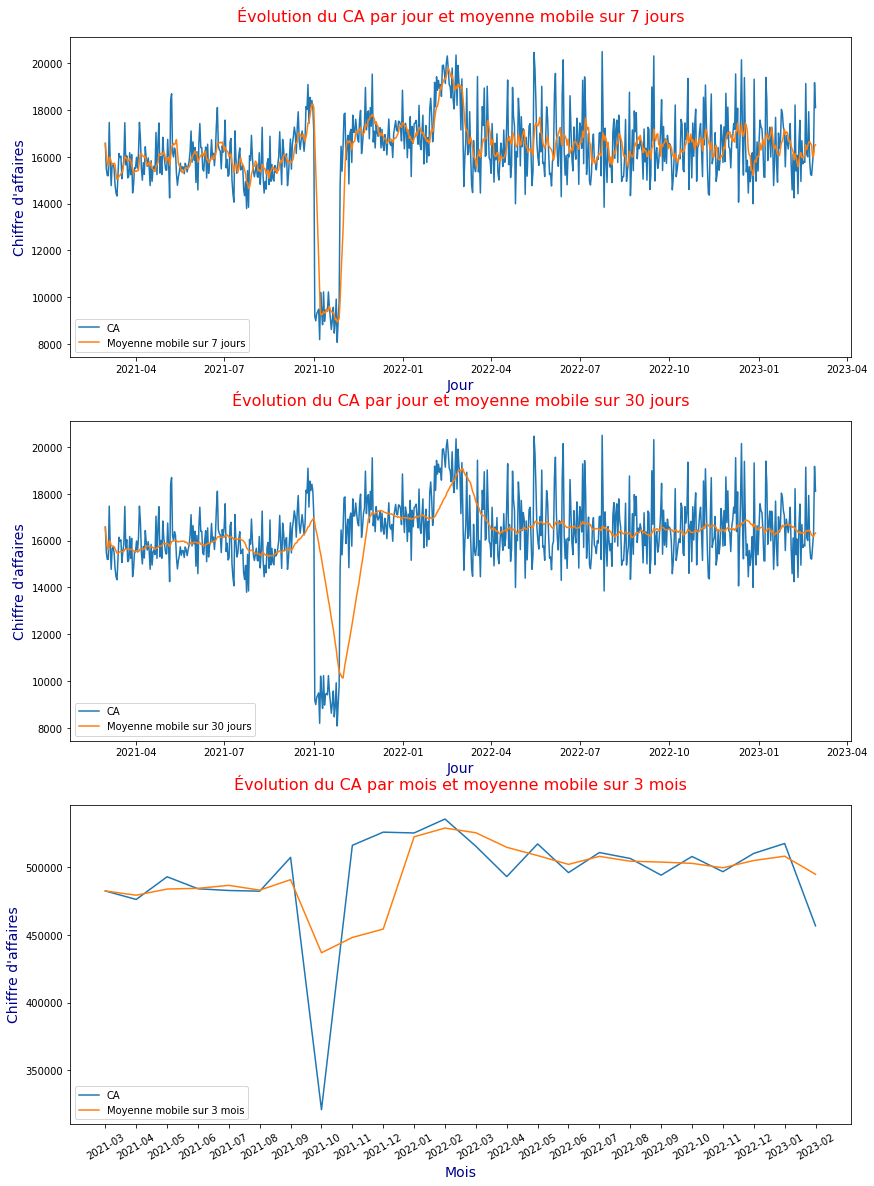

In [75]:
plt.figure(figsize =(14,20 ))

# Visualisation de l'évolution du CA par jour et de la moyenne mobile sur 7 jours
ax1 = plt.subplot(3,1,1)
plt.plot(df_jour.date, df_jour.price,label='CA' )
plt.plot(df_jour.date, df_jour.moyenne_mobile_7 ,label='Moyenne mobile sur 7 jours' )

plt.xlabel("Jour", fontsize = 14, color = 'darkblue')
plt.ylabel("Chiffre d'affaires", fontsize = 14, color = 'darkblue')
plt.title('Évolution du CA par jour et moyenne mobile sur 7 jours', fontsize = 16, color = 'red',y =1.03)
plt.legend(loc='lower left')

# Visualisation l'évolution du CA par jour et de la moyenne mobile sur 30 jours
ax2 = plt.subplot(3,1,2)
plt.plot(df_jour.date, df_jour.price,label='CA' )
plt.plot(df_jour.date, df_jour.moyenne_mobile_30 ,label='Moyenne mobile sur 30 jours' )

plt.xlabel("Jour", fontsize = 14, color = 'darkblue')
plt.ylabel("Chiffre d'affaires", fontsize = 14, color = 'darkblue')
plt.title('Évolution du CA par jour et moyenne mobile sur 30 jours', fontsize = 16, color = 'red',y =1.03)
plt.legend(loc='lower left')

# Visualisation de l'évolution du CA par mois et de la moyenne mobile sur 3 mois
ax3 = plt.subplot(3,1,3)
plt.plot(df_mois_1.month_2, df_mois_1.price,label='CA' )
plt.plot(df_mois_1.month_2, df_mois_1.moyenne_mobile ,label='Moyenne mobile sur 3 mois' )

plt.xlabel("Mois", fontsize = 14, color = 'darkblue')
plt.ylabel("Chiffre d'affaires", fontsize = 14, color = 'darkblue')
plt.title('Évolution du CA par mois et moyenne mobile sur 3 mois', fontsize = 16, color = 'red',y =1.03)
plt.legend(loc='lower left')
plt.tick_params(axis = "x", labelrotation=30)

Nous observons une diminution importante du CA en octobre 2021, je décide de faire un zoom sur cette periode afin de l'analyser en détails.

#**Zoom sur le CA par catégorie du mois d'octobre 2021**

In [76]:
df_oc = df_final.loc[ df_final.month_2== "2021-10", ["day", "price","categ"]]
df_oc.head()

,day,price,categ
68,2,4.99,0
71,3,15.99,0
80,13,17.01,0
86,24,4.63,0
93,5,5.99,0


In [77]:
# Créer une dataframe pivot pour  le CA par catégorie de produit par jour pour octobre 2021.
df_oct = pd.pivot_table(df_oc, index = ['day'], columns = 'categ', values = 'price',aggfunc=np.sum)
df_oct.head()

categ,0,1,2
day,,,
1,6950.500000,7003.79,3104.05
2,7141.010000,NaN,2041.12
3,6786.570000,NaN,2206.48
4,6554.876376,NaN,2746.08
5,6357.910000,NaN,3032.55


Text(0, 0.5, "Chiffre d'affaires")

<Figure size 936x432 with 0 Axes>

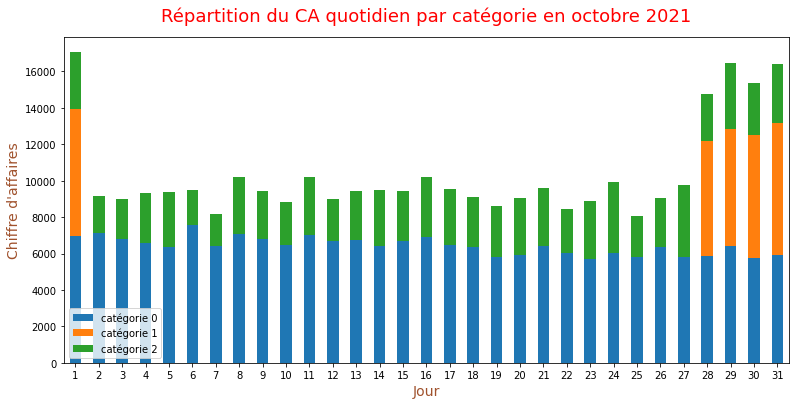

In [78]:
# Visualisation de la répartition du CA par catégorie avec le temps
fig = plt.figure(figsize =(13,6 ))
categories = ['catégorie 0', 'catégorie 1', 'catégorie 2']
df_oct.plot.bar(figsize=(13,6), stacked=True, rot=0)
plt.title("Répartition du CA quotidien par catégorie en octobre 2021",fontsize = 18, color = 'red',y =1.03)
plt.xlabel("Jour", fontsize = 14, color = '#A0522D')
plt.legend(labels=categories, loc='lower left')
plt.ylabel("Chiffre d'affaires", fontsize = 14, color = '#A0522D')

#*Conclusion:*

Il y a une diminution importante en octobre 2021: une hypothèse serait que les données entre le 02 et le 27 octobre sont manquantes pour la catégorie 1, et un petit abaissement en février 2023.
Les différents graphiques, tracés avec des moyennes mobiles à 7 jours, 1 mois et 3 mois, présentent une même tendance malgré l'influence des données potentiellement erronnées d'octobre.

#**Calcul du CA total, nombre de ventes et panier moyen**

In [79]:
df_final.head()

,client_id,sex,birth,id_prod,date,session_id,number,heure,year,month,day,price,categ,_merge,month_2,age
0,c_103,f,1986,0_1518,2022-05-20,s_211425,043970,13:21:29,2022,5,20,4.18,0,both,2022-05,36
1,c_8534,m,1988,1_251,2022-02-02,s_158752,149409,07:55:19,2022,2,2,15.99,1,both,2022-02,34
2,c_6714,f,1968,0_1277,2022-06-18,s_225667,155329,15:44:33,2022,6,18,7.99,0,both,2022-06,54
3,c_6941,m,2000,2_209,2021-06-24,s_52962,835891,04:19:29,2021,6,24,69.99,2,both,2021-06,21
4,c_4232,m,1980,0_1509,2023-01-11,s_325227,194479,08:22:08,2023,1,11,4.99,0,both,2023-01,43


In [80]:
# Les données couvrent la période allant du 2021-03-01 au 2023-02-28, soit deux ans ou 730 jours.
jours_date = pd.to_datetime('2023-02-28') - pd.to_datetime('2021-02-28')
jours_date

Timedelta('730 days 00:00:00')

- Calcul du CA total

In [81]:
ca_total = df_final.price.sum()

In [82]:
print("La chiffre d'affaires total est de: ", round(ca_total,2), "euros." )

La chiffre d'affaires total est de:  11856079.72 euros.


- Nombre total de ventes

In [83]:
nb_vente = df_final['session_id'].count()

In [84]:
print("Le total du nombre de vente est de: ", nb_vente )

Le total du nombre de vente est de:  679332


- Panier moyen

In [85]:
panier_moyen = round((ca_total/ nb_vente),2)
print("Le panier moyen est de: ",panier_moyen," euros.")

Le panier moyen est de:  17.45  euros.


- Calcul de la moyenne du CA mensuel sur les 12 derniers mois

Etant donné que la baisse importante du CA pour le mois du octobre 2021 est suspecte, je décide de calculer la moyenne du CA mensuel sur les 12 derniers mois (de 2022-02-28 à 2023-02-28) pour obtenir un résultat plus fiable.

In [86]:
df_moy = df_final[['date','price']]
df_moy.head()

,date,price
0,2022-05-20,4.18
1,2022-02-02,15.99
2,2022-06-18,7.99
3,2021-06-24,69.99
4,2023-01-11,4.99


In [87]:
# Créer la dataframe avec les 12 derniers mois
open_day = '2022-02-28'
close_day = '2023-02-28'
con1 = df_moy['date']>=open_day
con2 = df_moy['date']<=close_day
df_moy=df_moy[con1&con2].sort_values('date')
df_moy.head()

,date,price
640512,2022-02-28,26.99
89050,2022-02-28,8.99
371241,2022-02-28,6.06
89020,2022-02-28,11.38
18228,2022-02-28,13.11


In [88]:
ca_tot = df_moy.price.sum()

In [89]:
ca_moyenne = ca_tot/12

In [90]:
print("La moyenne du CA mensuel des 12 derniers mois (de 2022-02 à 2023-02) est de ", round(ca_moyenne,2), "euros.")

La moyenne du CA mensuel des 12 derniers mois (de 2022-02 à 2023-02) est de  503509.65 euros.


- Calcul du nombre de ventes mensuelles sur les 12 derniers mois

In [91]:
nbr_mois = df_final[['date','session_id']]
nbr_mois.head()

,date,session_id
0,2022-05-20,s_211425
1,2022-02-02,s_158752
2,2022-06-18,s_225667
3,2021-06-24,s_52962
4,2023-01-11,s_325227


In [92]:
# Créer la dataframe avec les 12 derniers mois
con3 = nbr_mois['date']>=open_day
con4 = nbr_mois['date']<=close_day
nbr_mois=nbr_mois[con3&con4].sort_values('date')
nbr_mois.head()

,date,session_id
640512,2022-02-28,s_172066
89050,2022-02-28,s_171941
371241,2022-02-28,s_171980
89020,2022-02-28,s_172220
18228,2022-02-28,s_172423


In [93]:
n_sess = nbr_mois.session_id.count()

In [94]:
nbr_mens = round(n_sess/12)

In [95]:
print(" Le nombre de ventes mensuelles sur les 12 derniers mois (de 2022-02 à 2023-02) est de", nbr_mens , ".")

 Le nombre de ventes mensuelles sur les 12 derniers mois (de 2022-02 à 2023-02) est de 28591 .


#*Conclusion:*

Le chiffre d'affaires total de la librairie est à peu près de 11.8 millions euros sur une période de 2 ans (2021-03-01 à 2023-02-28), avec environ 679 milles livres vendus.
Le panier moyen est de 17.45 euros.
La moyenne du CA mensuel des 12 derniers mois (de 2022-02 à 2023-02) est aux alentours de 503 milles euros par mois.
Le nombre de ventes mensuelles sur les 12 derniers mois est de 28591.

#Calcul du CA par catégorie dans le temps et la moyenne mobile sur 3 mois

A. Catégorie 0

In [96]:
# Créer la dataframe pour le CA par mois de la catégorie 0 
df_cat0 = df_final.loc[df_final.categ==0,["month_2", "price"]]
df_cat0 = df_cat0.groupby("month_2").sum().reset_index()

In [97]:
# Calcul la moyenne mobile sur 3 mois pour la catégorie 0
df_cat0['moyenne_mobile_0'] = df_cat0['price'].rolling(3,min_periods=1).mean()
df_cat0.head()

,month_2,price,moyenne_mobile_0
0,2021-03,193724.913692,193724.913692
1,2021-04,205371.394633,199548.154163
2,2021-05,196271.825504,198456.044610
3,2021-06,168017.617316,189886.945818
4,2021-07,144793.342752,169694.261858


B. Catégorie 1

In [98]:
# Créer la dataframe pour le CA par mois de la catégorie 1
df_cat1 = df_final.loc[df_final.categ==1,["month_2", "price"]]
df_cat1 = df_cat1.groupby("month_2").sum().reset_index()

In [99]:
# Calcul de la moyenne mobile sur 3 mois pour la catégorie 1
df_cat1['moyenne_mobile_1'] = df_cat1['price'].rolling(3,min_periods=1).mean()
df_cat1.head()

,month_2,price,moyenne_mobile_1
0,2021-03,186974.17,186974.170000
1,2021-04,156138.35,171556.260000
2,2021-05,165893.40,169668.640000
3,2021-06,189162.04,170397.930000
4,2021-07,188523.27,181192.903333


C. Catégorie 2

In [100]:
# Créer la dataframe pour le CA par mois de la catégorie 2
df_cat2 = df_final.loc[df_final.categ==2,["month_2", "price"]]
df_cat2 = df_cat2.groupby("month_2").sum().reset_index()

In [101]:
# Calcul de la moyenne mobile sur 3 mois pour la catégorie 1
df_cat2['moyenne_mobile_2'] = df_cat2['price'].rolling(3,min_periods=1).mean()
df_cat2.head()

,month_2,price,moyenne_mobile_2
0,2021-03,101837.27,101837.270000
1,2021-04,114748.49,108292.880000
2,2021-05,130863.35,115816.370000
3,2021-06,126983.37,124198.403333
4,2021-07,149561.34,135802.686667


In [102]:
# Créer une dataframe pivot pour le CA par catégorie de produit par mois.
df_categ = pd.pivot_table(df_final, index = ['month_2'], columns = 'categ', values = 'price',aggfunc=np.sum)
df_categ.head()

categ,0,1,2
month_2,,,
2021-03,193724.913692,186974.17,101837.27
2021-04,205371.394633,156138.35,114748.49
2021-05,196271.825504,165893.40,130863.35
2021-06,168017.617316,189162.04,126983.37
2021-07,144793.342752,188523.27,149561.34


#**-Visualisation**

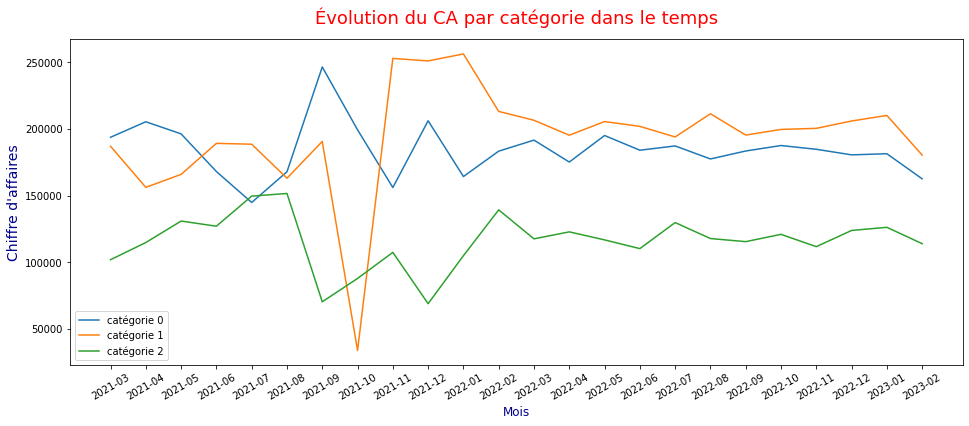

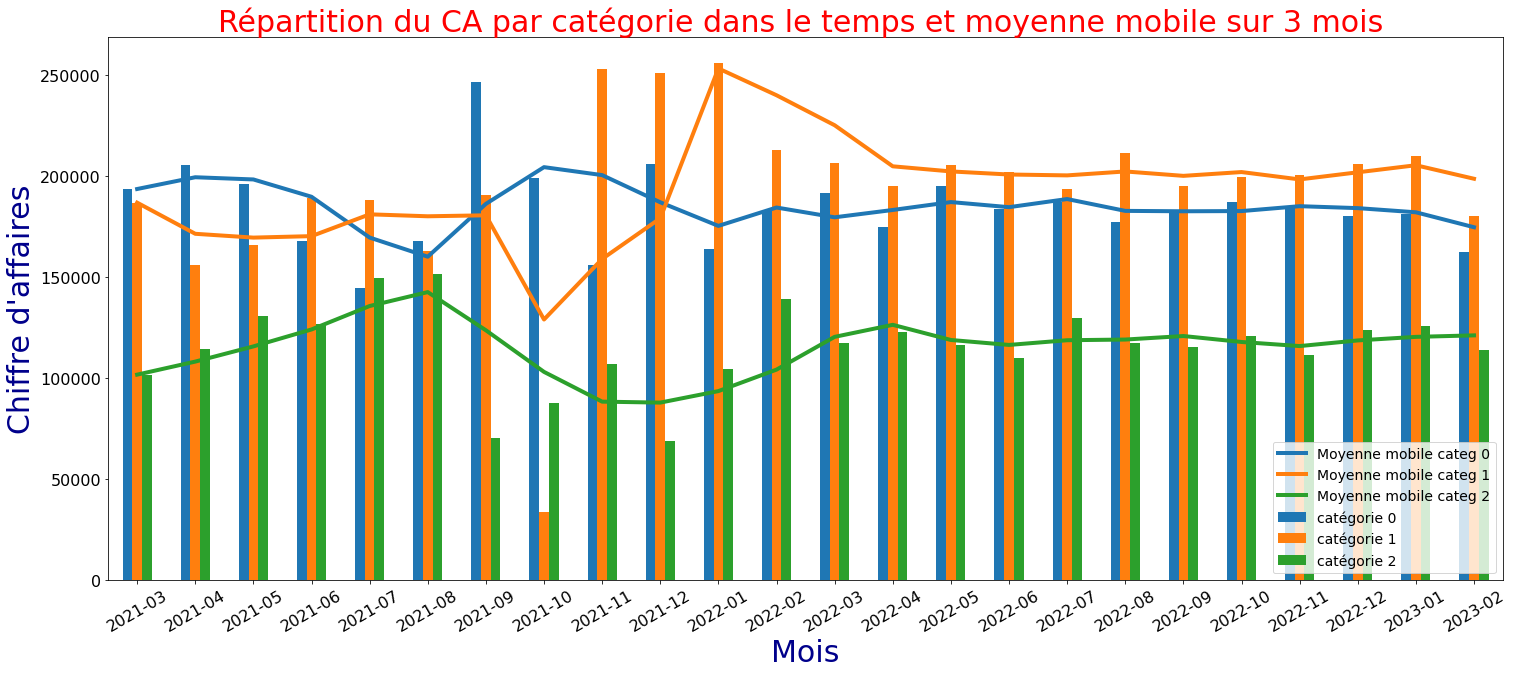

In [103]:
# Visualisation de l'évolution du CA par catégorie dans le temps
fig = plt.figure(figsize =(16,6))
plt.plot(df_cat0.month_2, df_cat0.price,label='catégorie 0' )
plt.plot(df_cat1.month_2, df_cat1.price,label='catégorie 1' )
plt.plot(df_cat2.month_2, df_cat2.price,label='catégorie 2' )
plt.xlabel("Mois", fontsize = 12, color = 'darkblue')
plt.ylabel("Chiffre d'affaires", fontsize = 14, color = 'darkblue')
plt.title('Évolution du CA par catégorie dans le temps', fontsize = 18, color = 'red',y =1.03)
plt.legend(loc='lower left')
plt.tick_params(axis = "x", labelrotation=30)


# Visualisation de la répartition du CA par catégorie dans le temps
categories = ['Moyenne mobile categ 0','Moyenne mobile categ 1', 'Moyenne mobile categ 2','catégorie 0', 'catégorie 1', 'catégorie 2']
df_categ.plot(kind='bar',figsize = (25, 10))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title(label = 'Répartition du CA par catégorie dans le temps et moyenne mobile sur 3 mois ',fontsize= 30, color = 'red')
plt.xlabel("Mois", fontsize = 30, color = 'darkblue')
plt.ylabel("Chiffre d'affaires", fontsize = 30, color = 'darkblue')
plt.tick_params(axis = "x", labelrotation=30)

# Visualisation de la moyenne mobile sur 3 mois par catégorie 
plt.plot(df_cat0.month_2, df_cat0.moyenne_mobile_0 ,linewidth = 4)
plt.plot(df_cat1.month_2, df_cat1.moyenne_mobile_1 ,linewidth = 4)
plt.plot(df_cat0.month_2, df_cat2.moyenne_mobile_2 ,linewidth = 4)
plt.legend(labels=categories, loc='lower right', fontsize=14)

*Conclusion:*

On note à partir de début 2022 une tendance stable pour les chiffres d'affaire des 3 catégories, avec une plus forte contribution des catégories 1 et 0, et une contribution moindre de la catégorie 2.

#Faire un zoom sur les références, pour voir un peu les tops et les flops, la répartition par catégorie

##3.2.1) Répartition par catégorie


- Répartition du CA par catégorie

In [104]:
# Grouper la somme des prix par catégorie
df_cat =  df_final.groupby("categ")[['price']].sum().reset_index()
df_cat

,categ,price
0,0,4.422082e+06
1,1,4.653723e+06
2,2,2.780275e+06


- Répartition du nombre de ventes par catégorie

In [105]:
nbr_cat= df_final.groupby("categ")[['session_id']].count().reset_index()
nbr_cat

,categ,session_id
0,0,415680
1,1,227169
2,2,36483


- Moyenne du prix de vente par catégorie

In [106]:
moy_cat = df_final.groupby("categ")[['price']].mean().reset_index()
moy_cat

,categ,price
0,0,10.638188
1,1,20.485730
2,2,76.207412


- Visualisation

Text(0, 0.5, 'price')

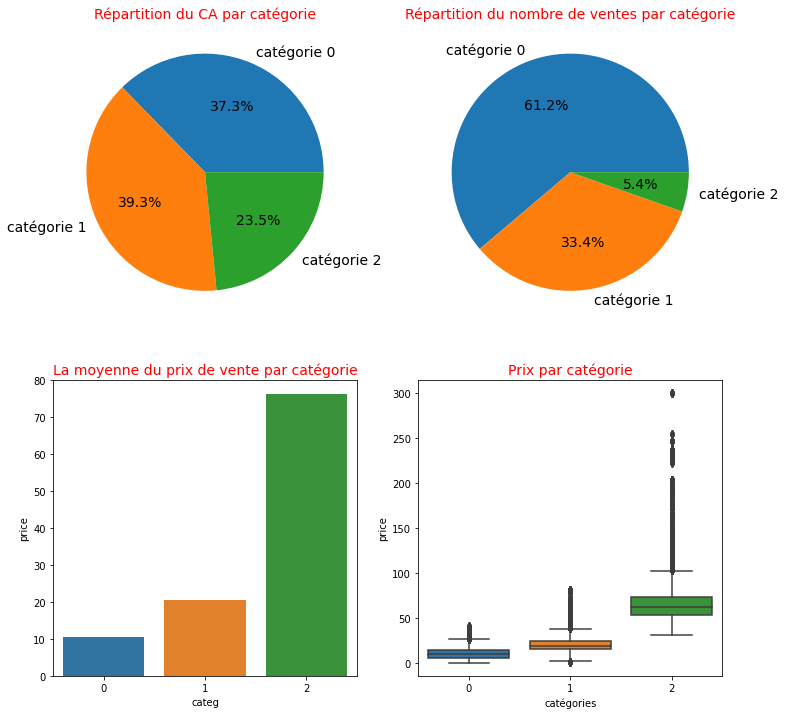

In [107]:
# Visualisation de la répartition du CA par catégorie dans le temps
categories = ['catégorie 0', 'catégorie 1', 'catégorie 2']
fig = plt.figure(figsize =(12,12 ))

ax1 = plt.subplot(2,2,1)
patches, l_text, p_text=plt.pie(x= df_cat['price'], labels = categories, autopct='%1.1f%%')
plt.title('Répartition du CA par catégorie', fontsize = 14, color = 'red')
for t in p_text:
    t.set_size(14)
for t in l_text:
    t.set_size(14)

# Visualisation de la répartition du CA par catégories
ax2 = plt.subplot(2,2,2)
patches, l_text, p_text=plt.pie(x= nbr_cat['session_id'], labels = categories, autopct='%1.1f%%')
plt.title('Répartition du nombre de ventes par catégorie', fontsize = 14, color = 'red')
for t in p_text:
    t.set_size(14)
for t in l_text:
    t.set_size(14)

# Visualisation de la moyenne du prix par catégories
ax3 = plt.subplot(2,2,3)
sns.barplot(x='categ', y = 'price', data = moy_cat)
plt.title('La moyenne du prix de vente par catégorie', fontsize = 14, color = 'red')

# Visualisation du prix par catégorie
ax4 = plt.subplot(2,2,4)
sns.boxplot(data=df_final, x="categ", y="price")
plt.title('Prix par catégorie',fontsize = 14, color = 'red')
plt.xlabel('catégories')
plt.ylabel('price')

#*Conclusions:*

Du fait de l'absence de données pour la catégorie 1 au mois d'octobre 2021, les produits de la catégorie 0 se sont le plus vendus, à peu près 2 fois plus que ceux de la catégorie 1.
Le prix moyen de la catégorie 1 est 2 fois plus cher que celui de la catégorie 0, c'est pourquoi la catégorie 1 a plus de CA.
La catégorie 2 a le moins de vente, car son prix moyen est beaucoup élevé (76 euros).
Avec le dernier graphique, pour la catégorie 2, on trouve que les valeurs de prix sont beaucoup plus dispersées vers les valeur élevées; aussi il faudrait mieux encadrer les prix de cette catégorie pour avoir plus de ventes.

#Les tops et les flops

Top ( CA et nombre de ventes)

In [108]:
df_final.head()

,client_id,sex,birth,id_prod,date,session_id,number,heure,year,month,day,price,categ,_merge,month_2,age
0,c_103,f,1986,0_1518,2022-05-20,s_211425,043970,13:21:29,2022,5,20,4.18,0,both,2022-05,36
1,c_8534,m,1988,1_251,2022-02-02,s_158752,149409,07:55:19,2022,2,2,15.99,1,both,2022-02,34
2,c_6714,f,1968,0_1277,2022-06-18,s_225667,155329,15:44:33,2022,6,18,7.99,0,both,2022-06,54
3,c_6941,m,2000,2_209,2021-06-24,s_52962,835891,04:19:29,2021,6,24,69.99,2,both,2021-06,21
4,c_4232,m,1980,0_1509,2023-01-11,s_325227,194479,08:22:08,2023,1,11,4.99,0,both,2023-01,43


- Top 10 en terme de CA

In [109]:
top_ca = df_final.groupby(['id_prod'])['price'].sum().reset_index()
top_ca_10 = top_ca.sort_values('price', ascending=False).head(10)
top_ca_10

,id_prod,price
3097,2_159,94893.50
3071,2_135,69334.95
3046,2_112,65407.76
3035,2_102,60736.78
3153,2_209,56971.86
2620,1_395,54356.25
2592,1_369,54025.48
3044,2_110,53846.25
3202,2_39,53060.85
3105,2_166,52449.12


In [110]:
ca_10 = 100*top_ca_10.price.sum()/df_final.price.sum()
print ("Le total du top 10 produits en terme de CA apporte ", round(ca_10,2), "% du CA total.")

Le total du top 10 produits en terme de CA apporte  5.19 % du CA total.


- Top 10 en terme de nombre de ventes

In [111]:
top_vente = df_final.groupby(['id_prod']).agg({'session_id':'count', 'price':'sum'}).reset_index()
top_vente_10 =top_vente.sort_values('session_id', ascending=False).head(10)
top_vente_10

,id_prod,session_id,price
2592,1_369,2252,54025.48
2645,1_417,2189,45947.11
2642,1_414,2180,51949.40
2734,1_498,2128,49731.36
2654,1_425,2096,35611.04
2630,1_403,1960,35260.40
2640,1_412,1951,32484.15
2641,1_413,1945,34990.55
2633,1_406,1939,48106.59
2634,1_407,1935,30940.65


In [112]:
ca_nb_10 = 100*top_vente_10.price.sum()/df_final.price.sum()
print ("Le CAdu top 10 produits en terme de nombre de ventes apporte ", round(ca_nb_10,2), "% du CA total.")

Le CAdu top 10 produits en terme de nombre de ventes apporte  3.53 % du CA total.


- Les produits qui apportent le plus de CA par catégorie

In [113]:
df_a = pd.pivot_table(df_final, index = ['id_prod', 'categ'], values = 'price',aggfunc=np.sum).reset_index()

In [114]:
ca_plus = df_a.sort_values('price', ascending=False).groupby('categ', as_index=False).first()
ca_plus

,categ,id_prod,price
0,0,0_1441,23452.65
1,1,1_395,54356.25
2,2,2_159,94893.50


- Les produits qui se sont vendus le plus par catégorie

In [115]:
df_b = pd.pivot_table(df_final, index = ['id_prod', 'categ'], values = 'session_id',aggfunc='count').reset_index()

In [116]:
vente_plus= df_b.sort_values('session_id', ascending=False).groupby('categ', as_index=False).first()
vente_plus

,categ,id_prod,session_id
0,0,0_1422,1292
1,1,1_369,2252
2,2,2_102,1027


- Visualisation des TOP

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 6 Text major ticklabel objects>)

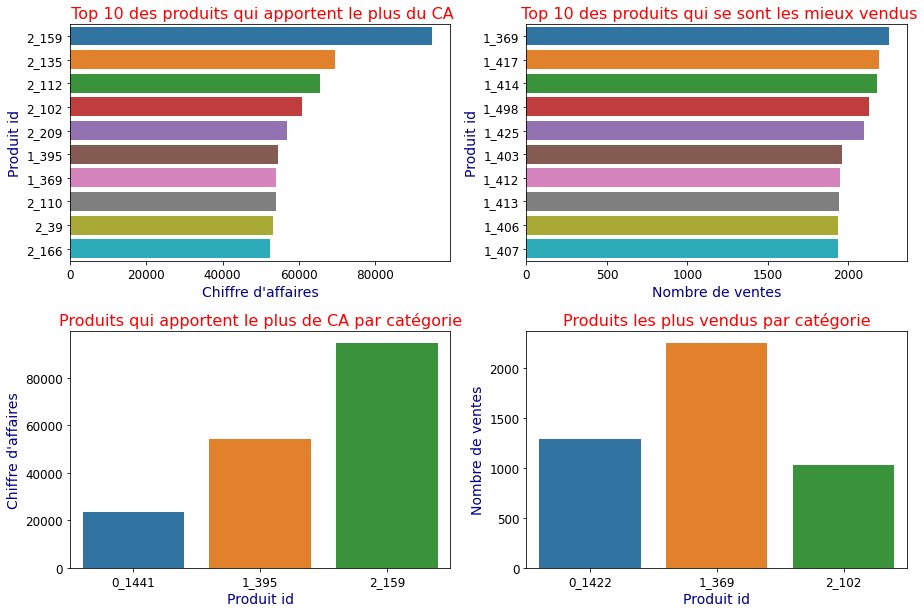

In [117]:
fig = plt.figure(figsize =(15,10))
plt.subplots_adjust(hspace=0.3)

# Visualisation du Top 10 en terme de CA
ax1 =  plt.subplot(2,2,1)
sns.barplot(x='price', y = 'id_prod', data = top_ca_10  )
plt.xlabel("Chiffre d'affaires",fontsize = 14, color = 'darkblue')
plt.ylabel("Produit id", fontsize = 14, color = 'darkblue')
plt.title(" Top 10 des produits qui apportent le plus du CA", fontsize = 16, color = 'red')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Visualisation du Top 10 en terme de nombre de ventes
ax2 = plt.subplot(2,2,2)
sns.barplot(x='session_id', y = 'id_prod', data = top_vente_10  )
plt.xlabel("Nombre de ventes",fontsize = 14, color = 'darkblue')
plt.ylabel("Produit id", fontsize = 14, color = 'darkblue')
plt.title(" Top 10 des produits qui se sont les mieux vendus", fontsize = 16, color = 'red')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Visualisation des produits qui apportent le plus de CA par catégorie
ax3 = plt.subplot(2,2,3)
sns.barplot(x='id_prod', y = 'price', data = ca_plus  )
plt.xlabel("Produit id",fontsize = 14, color = 'darkblue')
plt.ylabel("Chiffre d'affaires", fontsize = 14, color = 'darkblue')
plt.title("Produits qui apportent le plus de CA par catégorie", fontsize = 16, color = 'red')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Visualisation des produits les plus vendus par catégorie 
ax4 = plt.subplot(2,2,4)
sns.barplot(x='id_prod', y = 'session_id', data = vente_plus  )
plt.xlabel("Produit id",fontsize = 14, color = 'darkblue')
plt.ylabel("Nombre de ventes", fontsize = 14, color = 'darkblue')
plt.title("Produits les plus vendus par catégorie", fontsize = 16, color = 'red')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

- Flop 10 ( CA et nombre de ventes)

In [119]:
 #Flop 10 en terme de CA
flop_ca = df_final.groupby(['id_prod'])['price'].sum().reset_index()
flop_ca_10 = flop_ca.sort_values('price').head(10)
flop_ca_10

,id_prod,price
595,0_1539,0.99
313,0_1284,1.38
719,0_1653,1.98
1785,0_541,1.99
2080,0_807,1.99
665,0_1601,1.99
802,0_1728,2.27
549,0_1498,2.48
2180,0_898,2.54
925,0_1840,2.56


In [120]:
# Flop 10 en terme de nombre de ventes
Flop_vente = df_final.groupby(['id_prod'])['session_id'].count().reset_index()
Flop_vente_10 =Flop_vente.sort_values('session_id').head(10)
Flop_vente_10

,id_prod,session_id
1793,0_549,1
1327,0_2201,1
3176,2_23,1
313,0_1284,1
752,0_1683,1
2109,0_833,1
3264,2_98,1
698,0_1633,1
665,0_1601,1
3248,2_81,1


#*Conclusion:*

Le total du top 10 produits en terme de CA apporte 5.19 % du CA total.

Le nombre de ventes du top 10 produits en terme de nombre de ventes apporte 3.53 % du CA total.

Dans le top 10: les produits qui apportent le plus du CA sont ceux de la catégorie 2, et les livres les mieux vendus sont ceux de la catégorie 1.

Dans le flop 10: les produits qui amènent le moins de CA et qui se sont les moins vendus sont de la catégorie 0.

Dans la catégorie 0, le produit réferencé '0_1441' apporte le plus du CA, et la réference '0_1442' est la plus vendue.

Dans la catégorie 1, le produit réferencé '1_395' apporte le plus du CA, et la réference '1_369' est la plus vendue.

Dans la catégorie 2, le produit réferencé '2_159' apporte le plus du CA, et la réference '2_102' est la plus vendue.

#Profils clients

##Répartition du CA par client

- Trouver les 4 plus gros clients

In [121]:
# Répartition du CA par client
ca_cli = df_final.groupby(['client_id'])[['price']].sum().sort_values('price', ascending=False)
ca_cli.head(10)

,price
client_id,
c_1609,324033.350000
c_4958,289760.340000
c_6714,153662.749128
c_3454,113669.844564
c_3263,5276.870000
c_1570,5271.620000
c_2899,5214.050000
c_2140,5208.820000
c_7319,5155.770000


In [122]:
# Répartition de la quantité achetée par client
quant_cli = df_final.groupby(['client_id'])[['session_id']].count().sort_values('session_id', ascending=False)
quant_cli.head(10)

,session_id
client_id,
c_1609,25488
c_6714,9187
c_3454,6773
c_4958,5195
c_3263,403
c_2140,402
c_2595,398
c_2077,384
c_1637,380


In [123]:
ca_4client = 100 * ca_cli.head(4).price.sum() / df_final.price.sum()
print ("Ces 4 gros clients apportent ", round(ca_4client,2), "% du CA total.")

Ces 4 gros clients apportent  7.43 % du CA total.


#*Conclusion:*
Après calcul, on trouve 4 très gros clients (client_id: c_1609, c_6714, c_3454, c_4958) qui ont acheté plus de 5000 produis et génèrent un CA total de plus de 11 milles euros chacun sur deux ans.
Je décide de les enlever de la dataframe, car nous pouvons considérer que ce sont des entreprises et non des clients particuliers.

- Supprimer les données de ces 4 gros clients

In [124]:
df_final.head()

,client_id,sex,birth,id_prod,date,session_id,number,heure,year,month,day,price,categ,_merge,month_2,age
0,c_103,f,1986,0_1518,2022-05-20,s_211425,043970,13:21:29,2022,5,20,4.18,0,both,2022-05,36
1,c_8534,m,1988,1_251,2022-02-02,s_158752,149409,07:55:19,2022,2,2,15.99,1,both,2022-02,34
2,c_6714,f,1968,0_1277,2022-06-18,s_225667,155329,15:44:33,2022,6,18,7.99,0,both,2022-06,54
3,c_6941,m,2000,2_209,2021-06-24,s_52962,835891,04:19:29,2021,6,24,69.99,2,both,2021-06,21
4,c_4232,m,1980,0_1509,2023-01-11,s_325227,194479,08:22:08,2023,1,11,4.99,0,both,2023-01,43


In [125]:
# Créer la dataframe avec ces 4 gros clients
gros_cli = df_final[(df_final.client_id== 'c_1609')|(df_final.client_id=='c_6714')|(df_final.client_id=='c_3454')|(df_final.client_id=='c_4958')]
gros_cli.head()

,client_id,sex,birth,id_prod,date,session_id,number,heure,year,month,day,price,categ,_merge,month_2,age
2,c_6714,f,1968,0_1277,2022-06-18,s_225667,155329,15:44:33,2022,6,18,7.99,0,both,2022-06,54
17,c_6714,f,1968,1_661,2022-09-13,s_267366,746197,10:18:02,2022,9,13,22.99,1,both,2022-09,54
32,c_4958,m,1999,1_426,2021-06-21,s_51846,023863,17:47:57,2021,6,21,19.44,1,both,2021-06,22
63,c_4958,m,1999,1_506,2021-09-29,s_97203,731798,03:52:29,2021,9,29,13.65,1,both,2021-09,22
67,c_1609,m,1980,0_1446,2022-10-05,s_278030,225116,07:43:00,2022,10,5,8.09,0,both,2022-10,42


In [126]:
# Créer la nouvelle dataframe sans les données des ces 4 gros clients
df_final_c = df_final.drop(gros_cli.index).reset_index(drop=True)
df_final_c.head()

,client_id,sex,birth,id_prod,date,session_id,number,heure,year,month,day,price,categ,_merge,month_2,age
0,c_103,f,1986,0_1518,2022-05-20,s_211425,043970,13:21:29,2022,5,20,4.18,0,both,2022-05,36
1,c_8534,m,1988,1_251,2022-02-02,s_158752,149409,07:55:19,2022,2,2,15.99,1,both,2022-02,34
2,c_6941,m,2000,2_209,2021-06-24,s_52962,835891,04:19:29,2021,6,24,69.99,2,both,2021-06,21
3,c_4232,m,1980,0_1509,2023-01-11,s_325227,194479,08:22:08,2023,1,11,4.99,0,both,2023-01,43
4,c_1478,f,1972,0_1418,2022-10-20,s_285425,084030,15:59:16,2022,10,20,8.57,0,both,2022-10,50


- Courbe de Lorenz et indice de Gini sans ces 4 gros clients

In [127]:
# Créer la dataframe pour'CA par client' sans ces 4 clients
ca_client = df_final_c.groupby(['client_id'])[['price']].sum().sort_values('price', ascending=False).reset_index()
ca_client.head()

,client_id,price
0,c_3263,5276.87
1,c_1570,5271.62
2,c_2899,5214.05
3,c_2140,5208.82
4,c_7319,5155.77


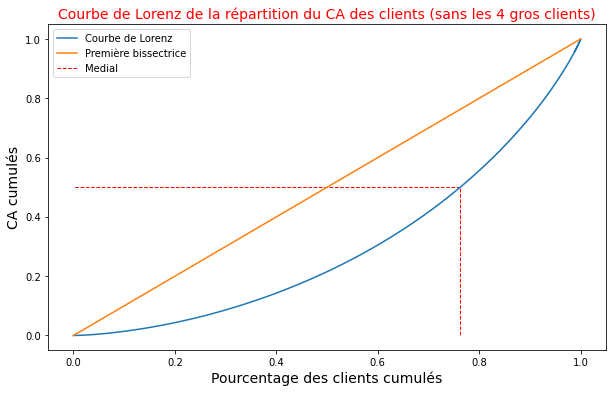

In [128]:
# Courbe de Lorenz sans les 4 gros clients
n_client = len(ca_client.client_id)
ca_c = ca_client.price.values
lorenz = np.cumsum(np.sort(ca_c)) / ca_c.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
medial = lorenz[(lorenz < 0.5)].size / lorenz.size # Calcul de l'intersection
xaxis = np.linspace(0-1/n_client,1+1/n_client,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

plt.figure(figsize =(10,6))
plt.plot(xaxis,lorenz,drawstyle='steps-post',label = 'Courbe de Lorenz')
plt.plot([0,1], [0,1], label = 'Première bissectrice') #tracer la bisséctrice

plt.vlines(medial, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1,label='Medial')
plt.hlines(xmin=medial, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)
plt.title('Courbe de Lorenz de la répartition du CA des clients (sans les 4 gros clients)',fontsize = 14, color = 'red')
plt.xlabel('Pourcentage des clients cumulés', fontsize=14)
plt.ylabel('CA cumulés', fontsize=14) 
plt.legend(loc='upper left', fontsize=10)

In [129]:
# Calcul de l'indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n_client # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S

In [130]:
print('Le coefficient de Gini sans les 4 gros clients est de:', round(gini,3),'.')

Le coefficient de Gini sans les 4 gros clients est de: 0.403 .


#*Conclusion:*
L'analyse de la courbe de Lorentz et de l'indice de Gini (sans les 4 gros clients) et le coefficient de Gininous indique une repartition des ventes légèrement inégalitaire(L'inégalité augmente avec le coefficient de Gini). En effet, comme on peut l'observer sur la courbe de Lorentz, 50 % du CA est réalisé par 76 % des clients.

- Courbe de Lorenz et indice de Gini avec les 4 gros clients

Je réalisé un test pour voir la différence avec et sans les 4 gros clients

In [131]:
# Reprendre la dataframe 'CA par client' avec les 4 clients
ca_cli.reset_index(inplace=True)
ca_cli.head()

,client_id,price
0,c_1609,324033.350000
1,c_4958,289760.340000
2,c_6714,153662.749128
3,c_3454,113669.844564
4,c_3263,5276.870000


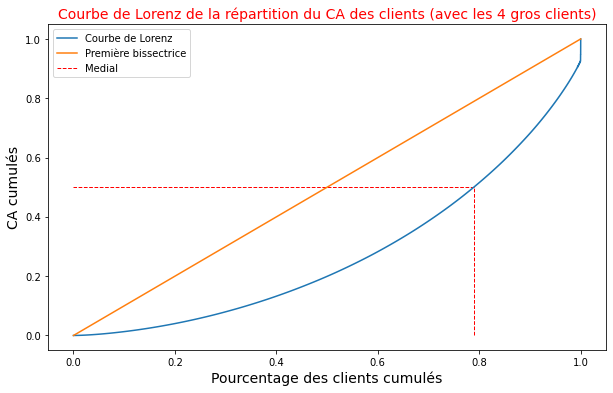

In [132]:
# Courbe de Lorenz avec les 4 gros clients
n_client_2 = len(ca_cli.client_id)
ca_c_2 = ca_cli.price.values
lorenz_2 = np.cumsum(np.sort(ca_c_2)) / ca_c_2.sum()
lorenz_2 = np.append([0],lorenz_2) # La courbe de Lorenz commence à 0
medial_2 = lorenz_2[(lorenz_2 < 0.5)].size / lorenz_2.size # Calcul de l'intersection
xaxis_2 = np.linspace(0-1/n_client_2,1+1/n_client_2,len(lorenz_2)) 
plt.figure(figsize =(10,6))
plt.plot(xaxis_2,lorenz_2,drawstyle='steps-post',label = 'Courbe de Lorenz')
plt.plot([0,1], [0,1], label = 'Première bissectrice') #tracer la bisséctrice

plt.vlines(medial_2, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1,label='Medial')
plt.hlines(xmin=medial_2, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)
plt.title('Courbe de Lorenz de la répartition du CA des clients (avec les 4 gros clients)',fontsize = 14, color = 'red')
plt.xlabel('Pourcentage des clients cumulés', fontsize=14)
plt.ylabel('CA cumulés', fontsize=14) 
plt.legend(loc='upper left', fontsize=10)

In [133]:
# Calcul de l'indice de Gini
AUC_2 = (lorenz_2.sum() -lorenz_2[-1]/2 -lorenz_2[0]/2)/n_client_2 # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S_2 = 0.5 - AUC_2 # surface entre la première bissectrice et le courbe de Lorenz
gini_2 = 2*S_2

In [134]:
print('Le coefficient de Gini avec les 4 gros clients est de:', round(gini_2,3),'.')

Le coefficient de Gini avec les 4 gros clients est de: 0.446 .


#*Conclusion:*
La répartition du CA des clients (avec les gros 4 clients) est légèrement plus inégalitaire que celle sans ces 4 gros clients (coéfficient de Gini : 0.446 > 0.403).
Mais il n'y a pas de grande difference.

#Age


- Visualisation la répartition de l'année de naissance des clients

(array([  0., 100., 200., 300., 400., 500.]),
 <a list of 6 Text major ticklabel objects>)

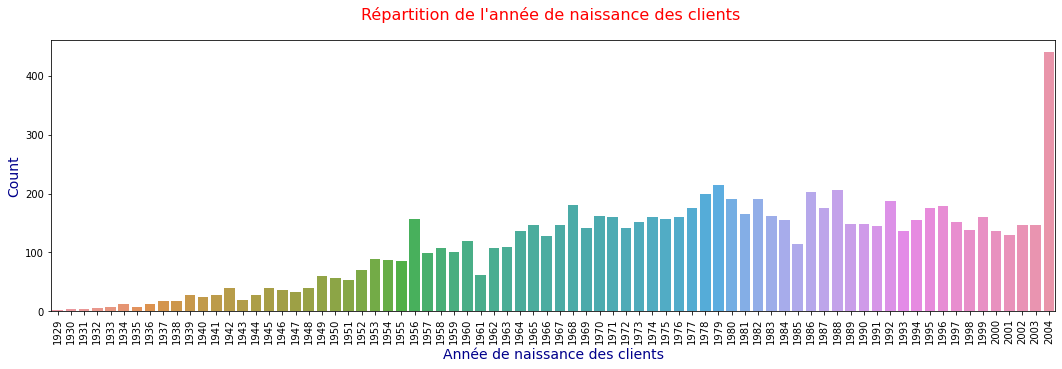

In [135]:
fig = plt.figure(figsize =(18,5))
sns.countplot(x=customers.birth)
plt.xlabel("Année de naissance des clients",fontsize = 14, color = 'darkblue')
plt.ylabel("Count", fontsize = 14, color = 'darkblue')
plt.title("Répartition de l'année de naissance des clients ", fontsize = 16, color = 'red', y= 1.05)
plt.xticks(fontsize = 10, rotation=90)
plt.yticks(fontsize = 10)

- CA en fonction d'âge des clients (sans les 4 gros clients)

In [136]:
# Créer la dataframe avec âge et somme de CA
age_ca = df_final_c.groupby('age')['price'].agg(['count', 'sum']).sort_values('sum', ascending=False).reset_index()
age_ca.head()

,age,count,sum
0,18,9636,384592.430000
1,43,24527,327571.261009
2,42,22835,304340.495504
3,44,22849,300448.888257
4,35,22056,290002.403692


In [137]:
age_ca.describe()

,age,count,sum
count,78.000000,78.000000,78.000000
mean,55.500000,8111.397436,140704.531229
std,22.660538,7293.953358,102625.798416
min,17.000000,23.000000,437.770000
25%,36.250000,2110.250000,35532.735000
50%,55.500000,5434.500000,135763.732282
75%,74.750000,12453.750000,229351.412316
max,94.000000,24527.000000,384592.430000


Text(0.5, 1.0, 'Montant total des achats par âge des clients')

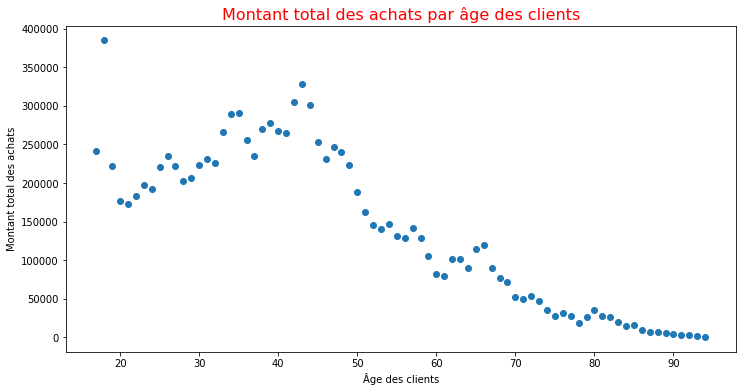

In [138]:
# Visualisation de CA en fonction d'âge des clients
plt.figure(figsize=(12, 6))
plt.scatter(age_ca['age'],age_ca['sum'])
plt.ylabel('Montant total des achats')
plt.xlabel('Âge des clients')
plt.title("Montant total des achats par âge des clients",fontsize= 16, color = 'red')

#*Conclusion*:
Avec ces 2 graphiques, on trouve que:

Les données correspondent à des clients ayant à minima 17ans.
Beaucoup de clients sont nées en 2004.
Les clients ayant 18ans donnent la contribution au CA la plus élevée, ce qui pourrait s'expliquer par le nombre beaucoup plus important de clients ayant cette âge.

- Répartition de l'année de naissance et le genre des clients

Pyramide de population de clients

Pour les femmes

In [139]:
# Créer la dataframe de femme
client_f = customers.loc[customers['sex']=='f']
client_f.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
6,c_285,f,1967


In [140]:
# Définir les trache de l'année de naissance
an_tranch_f = pd.cut(client_f['birth'], bins=[1928,1945,1960,1975,1990,2004])

In [141]:
# Créer la dataframe avec l'année de naissance et nombre de genre de femme
client_birth_f= client_f.groupby([an_tranch_f])[['sex']].count().reset_index()
client_birth_f

,birth,sex
0,"(1928, 1945]",172
1,"(1945, 1960]",635
2,"(1960, 1975]",1090
3,"(1975, 1990]",1346
4,"(1990, 2004]",1248


Pour les hommes

In [142]:
# Créer la dataframe de homme
client_m = customers.loc[customers['sex']=='m']
client_m.head()

,client_id,sex,birth
4,c_5320,m,1943
5,c_415,m,1993
8,c_6446,m,1971
9,c_6866,m,1993
10,c_1013,m,1982


In [143]:
# Définir les trache de l'année de naissance
an_tranch_m = pd.cut(client_m['birth'], bins=[1928,1945,1960,1975,1990,2004])

In [144]:
# Créer la dataframe avec l'année de naissance et nombre de genre de homme
client_birth_m= client_m.groupby([an_tranch_m])[['sex']].count().reset_index()
client_birth_m

,birth,sex
0,"(1928, 1945]",128
1,"(1945, 1960]",560
2,"(1960, 1975]",999
3,"(1975, 1990]",1266
4,"(1990, 2004]",1179


- Répartition du CA en fonction de la tranche d'âge des clients (sans les 4 gros clients)

In [145]:
df_final_c.head()

,client_id,sex,birth,id_prod,date,session_id,number,heure,year,month,day,price,categ,_merge,month_2,age
0,c_103,f,1986,0_1518,2022-05-20,s_211425,043970,13:21:29,2022,5,20,4.18,0,both,2022-05,36
1,c_8534,m,1988,1_251,2022-02-02,s_158752,149409,07:55:19,2022,2,2,15.99,1,both,2022-02,34
2,c_6941,m,2000,2_209,2021-06-24,s_52962,835891,04:19:29,2021,6,24,69.99,2,both,2021-06,21
3,c_4232,m,1980,0_1509,2023-01-11,s_325227,194479,08:22:08,2023,1,11,4.99,0,both,2023-01,43
4,c_1478,f,1972,0_1418,2022-10-20,s_285425,084030,15:59:16,2022,10,20,8.57,0,both,2022-10,50


In [146]:
# Définir les intervalles d'âge
df_int= pd.cut(df_final_c['age'], bins=[17,32,47,62,77,94])
df_int

0         (32, 47]
1         (32, 47]
2         (17, 32]
3         (32, 47]
4         (47, 62]
            ...   
632684    (62, 77]
632685    (32, 47]
632686    (32, 47]
632687    (32, 47]
632688    (17, 32]
Name: age, Length: 632689, dtype: category
Categories (5, interval[int64, right]): [(17, 32] < (32, 47] < (47, 62] < (62, 77] < (77, 94]]

In [147]:
# Créer la dataframe avec les intervalles d'âge et le CA
interval_age_ca = df_final_c.groupby(df_int)[['price']].sum().reset_index()
interval_age_ca 

,age,price
0,"(17, 32]",3.293694e+06
1,"(32, 47]",4.077500e+06
2,"(47, 62]",2.145924e+06
3,"(62, 77]",9.884926e+05
4,"(77, 94]",2.280773e+05


- Nombre de ventes en fonction de l'intervalle d'âge des clients (sans les 4 gros clients)

In [148]:
# Créer la dataframe avec les intervalles d'âge et le nombre de ventes
interval_age_vente = df_final_c.groupby(df_int)[['session_id']].count().reset_index()
interval_age_vente

,age,session_id
0,"(17, 32]",108721
1,"(32, 47]",308205
2,"(47, 62]",137207
3,"(62, 77]",59072
4,"(77, 94]",13549


- Visualisation

Text(0.5, 1.05, "Nombre de ventes par intervalle d'âge des clients (sans les 4 gros clients)")

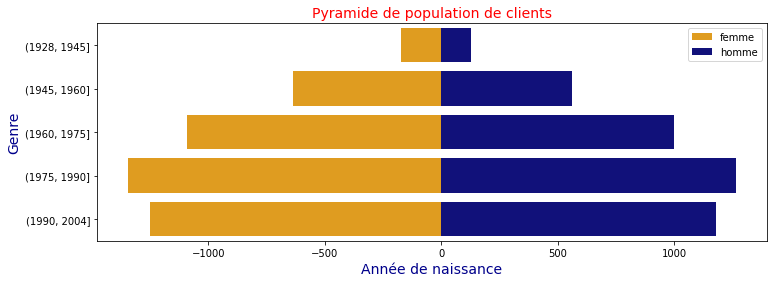

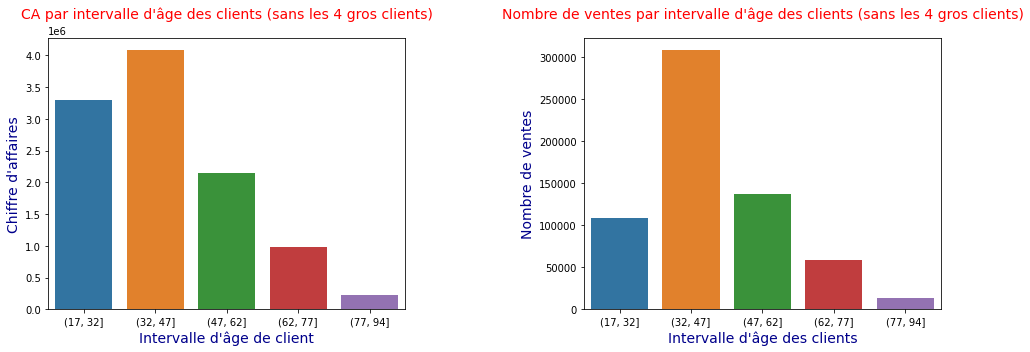

In [149]:
# Pyramide de population de clients
plt.figure(figsize=(12, 4))
sns.barplot(x=-client_birth_f.sex,y='birth', data=client_birth_f, label="femme", color="orange", errwidth=0) 
sns.barplot(x='sex', y='birth', data=client_birth_m, label="homme", color="darkblue", errwidth=0) 
plt.legend(ncol=1, loc="upper right", frameon=True)
plt.title('Pyramide de population de clients',color='r',fontsize=14)
plt.xlabel("Année de naissance",fontsize = 14, color = 'darkblue')
plt.ylabel("Genre", fontsize = 14, color = 'darkblue')


fig = plt.figure(figsize =(16,5))
plt.subplots_adjust(wspace=0.5)

# Visualisation du CA par intervalle d'âge des clients (sans les 4 gros clients)
ax1 = plt.subplot(1,2,1)
sns.barplot(x='age', y = 'price', data = interval_age_ca   )
plt.xlabel("Intervalle d'âge de client",fontsize = 14, color = 'darkblue')
plt.ylabel("Chiffre d'affaires", fontsize = 14, color = 'darkblue')
plt.title("CA par intervalle d'âge des clients (sans les 4 gros clients)", fontsize = 14, color = 'red', y= 1.05)

# Visualisation du nombre de ventes par intervalle d'âge des clients (sans les 4 gros clients)
ax2 = plt.subplot(1,2,2)
sns.barplot(x='age', y = 'session_id', data = interval_age_vente  )
plt.xlabel("Intervalle d'âge des clients",fontsize = 14, color = 'darkblue')
plt.ylabel("Nombre de ventes", fontsize = 14, color = 'darkblue')
plt.title("Nombre de ventes par intervalle d'âge des clients (sans les 4 gros clients)", fontsize = 14, color = 'red', y= 1.05)

*Conclusion:*

Sans compter les 4 gros clients, les clients entre 32 et 47 ans ont acheté le plus de livres et donnent la contribution au CA la plus importante, correspondant dans la graphique 'Pyramide de population de clients' à la tranche d'année de naissance 1975-1990.
Les clients plus de 60ans ont acheté moins de livres et donnent la contribution au CA la plus faible, correspondant dans la graphique 'Pyramide de population de clients' à la tranche d'année de naissance 1928-1945.

#Partie 4 - Vérification et analyse de la corrélation entre différents variables ( Mission Julie)

- Le lien entre le genre d’un client et les catégories des livres achetés ;
- Le lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés.

*Pour cette partie, j'utilise les données en excluant les 4 gros clients qui pourraient fausser mes analyses.*

##Le lien entre le genre d’un client et les catégories de livres achetés

Vu que ce sont deux variables qualitatives( 'genre' et 'catégories'), je les analyse avec le Chi-2:

- Création d'un tableau de contingence
- Calcul du coefficient de chi2

Il est cependant possible de faire apparaître sur ce tableau les cases participants le plus à une possible corrélation, via un heatmap.

- Création d'une table de contingence -- variables « genre» et « catégorie »

In [150]:
x = 'categ'
y = 'sex'
cont = df_final_c[[x, y]].pivot_table(index=x, columns=y,aggfunc=len, margins=True, margins_name='Total')
cont

sex,f,m,Total
categ,,,
0,200904,186589,387493
1,111331,101017,212348
2,16980,15868,32848
Total,329215,303474,632689


*Conclusion:*

Par les valeurs du tableau de contingence, nous pouvons constater qu'il y a plus de ventes de chaque catégorie chez les femmes. Nous pouvons, au premier abord, constater qu'il y a une différence de comportement entre les genres.

##Test de Khi2

Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:

- H0: Les deux variables (le genre d’un client et les catégories des livres achetés ) sont indépendantes
- H1: les deux variables ne sont pas indépendantes

In [151]:
chi2, pvalue, degrees, expected = stats.chi2_contingency(cont)
chi2, degrees, pvalue

(20.200173796862927, 6, 0.002551063708568263)

*Conclusion:*

Notre p-value étant de 0.0025 et < 0.05 (alpha = 5%), on rejete H0 et on peut alors conclure que les variables genre et catégorie de produits sont dépendantes.

#Achats par catégorie selon le genre et Heatmap

Chaque valeur de chaque case du Heatmap est une mesure de la contribution à la non-indépendance entre la catégorie de produit et le genre, qui prend des valeurs entre 0 et 1. 0 représentant une source d'indépendance, et 1 une source de non-indépendance.

- Achats par catégorie selon le genre

In [152]:
# Achats par catégorie selon le genre, proportions par catégorie
cat_genre = df_final_c.groupby(['categ','sex'],as_index=False)['client_id'].count() 
cat_genre = cat_genre.pivot(index='sex',columns=['categ'], values=['client_id'])
cat_genre.rename(columns={'client_id':'quantité'},inplace=True) 
cat_genre = cat_genre.reset_index() 
cat_genre

sex quantité               
categ            0       1      2
0       f   200904  111331  16980
1       m   186589  101017  15868

In [153]:
# Ajouter les colonnes de proportions
cat_genre[('proportions', 0)]=cat_genre[('quantité', 0)]*100/(cat_genre[('quantité', 0)]+cat_genre[('quantité', 1)]+cat_genre[('quantité', 2)])
cat_genre[('proportions', 1)]=cat_genre[('quantité', 1)]*100/(cat_genre[('quantité', 0)]+cat_genre[('quantité', 1)]+cat_genre[('quantité', 2)])
cat_genre[('proportions', 2)]=cat_genre[('quantité', 2)]*100/(cat_genre[('quantité', 0)]+cat_genre[('quantité', 1)]+cat_genre[('quantité', 2)])
cat_genre

sex quantité                proportions                     
categ            0       1      2           0          1         2
0       f   200904  111331  16980   61.025166  33.817110  5.157724
1       m   186589  101017  15868   61.484345  33.286871  5.228784

In [154]:
# Achats par catégorie selon le genre, proportions par genre
cat_genre_2 = df_final_c.groupby(['categ','sex'],as_index=False)['client_id'].count() 
cat_genre_2 = cat_genre_2.pivot(index='categ',columns=['sex'], values=['client_id'])
cat_genre_2.rename(columns={'client_id':'quantité'},inplace=True) 
cat_genre_2 = cat_genre_2.reset_index() 
cat_genre_2

categ quantité        
sex              f       m
0       0   200904  186589
1       1   111331  101017
2       2    16980   15868

In [155]:
# Ajouter les colonnes de proportions
cat_genre_2[('proportions', 'f')]=cat_genre_2[('quantité', 'f')]*100/(cat_genre_2[('quantité', 'f')]+cat_genre_2[('quantité', 'm')])
cat_genre_2[('proportions', 'm')]=cat_genre_2[('quantité', 'm')]*100/(cat_genre_2[('quantité', 'f')]+cat_genre_2[('quantité', 'm')])
cat_genre_2

categ quantité         proportions           
sex              f       m           f          m
0       0   200904  186589   51.847130  48.152870
1       1   111331  101017   52.428561  47.571439
2       2    16980   15868   51.692645  48.307355

- Heatmap et visualisation d'achats par catégorie selon le genre

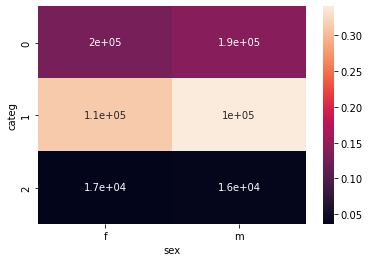

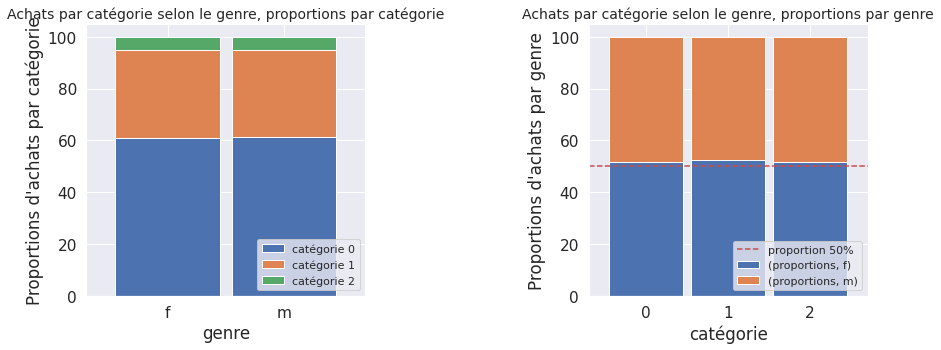

In [156]:
# Heatmap
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_final_c)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
sns.set(rc={'figure.figsize': (12, 6)},font_scale=1.4)

figure,axes = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.8)

# Visualisation d'achats par catégorie selon le genre, proportions par catégorie
categories = ['catégorie 0', 'catégorie 1', 'catégorie 2']

ax1=cat_genre[['sex','proportions']].plot(x='sex', kind='bar', stacked=True, figsize=(14,5),width = 0.9, ax=axes[0], title='Achats par catégorie selon le genre, proportions par catégorie',xlabel="genre",ylabel="Proportions d'achats par catégorie",legend=['catégorie 0', 'catégorie 1', 'catégorie 2'],rot=0)
ax1.legend( labels=categories,loc="lower right", prop={'size':11})
ax1.axes.title.set_size(14)


# Visualisation d'achats par catégorie selon le genre, proportions par genre
ax2=cat_genre_2[['categ','proportions']].plot(x='categ', kind='bar', stacked=True, figsize=(14,5),width = 0.9, ax=axes[1], title='Achats par catégorie selon le genre, proportions par genre',xlabel="catégorie",ylabel="Proportions d'achats par genre",rot=0)
ax2.axhline(y = 50, color = 'r', linestyle = '--', label = 'proportion 50%') 
ax2.legend(loc="lower right", prop={'size':11})
ax2.axes.title.set_size(14)

*Conclusion:*
Avec la heatmap, On constate que:

- Les données de la catégorie 0 ont une contribution à la non-indépendance de presque 15%
- Celles de la catégorie 1 comptent pour presque 30%
- La catégorie 2 contribue de façon plus faible à une éventuelle corrélation

On constate également que:

- La répartition des catégories d'achat entre hommes et femmes est quasi équivalente
- Dans les 3 catégories, et notamment pour la catégorie 1, la part d'achat des femmes est plus élevée que celle des hommes; cependant ce résultat est à nuancer du fait que le nombre total de clientes femmes dépasse celui du nombre total de clients hommes, ce qui pourrait être une explication à cette observation.

#Le lien entre l’âge des clients et le montant total des achats

Pour tester deux variables quantitatives, je utilise:

- Visualisation avec nuage de points avec le régression linéaire
Test de corrélation (pearson)

In [157]:
# Créer la dataframe avec âge et somme de CA
age_ca = df_final_c.groupby('age')['price'].agg(['count', 'sum']).sort_values('sum').reset_index()
age_ca.head()

,age,count,sum
0,94,23,437.77
1,93,129,2115.62
2,92,196,3309.62
3,91,210,3455.02
4,90,243,4114.03


- Visualisation de l’âge des clients et le montant total des achats

(15.0, 95.0)

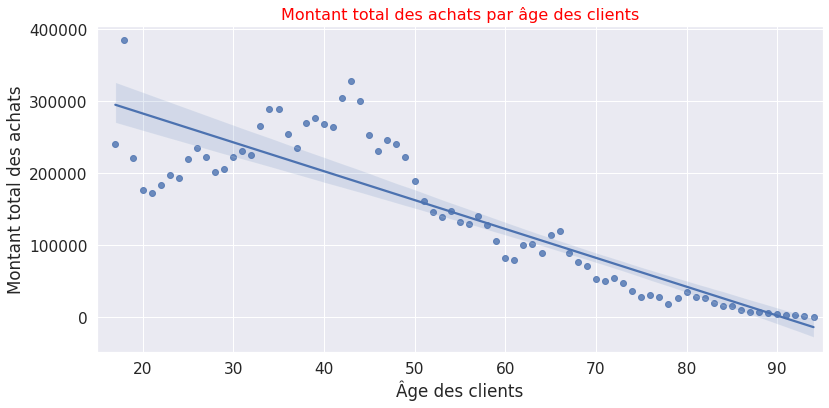

In [158]:
plt.figure(figsize=(13, 6))
sns.regplot(x='age', y='sum', data = age_ca)
plt.ylabel('Montant total des achats')
plt.xlabel('Âge des clients')
plt.title("Montant total des achats par âge des clients",fontsize= 16, color = 'red')
plt.xlim(15,95)

- Test de corrélation (pearson)

In [159]:
print('La covariance est de:', np.cov(age_ca['age'], age_ca['sum'],ddof=0)[1,0])
print('Le coefficient de corrélation linéaire est de:', stats.pearsonr(age_ca['age'], age_ca['sum'])[0])

La covariance est de: -2034698.705343346
Le coefficient de corrélation linéaire est de: -0.8862927840259387


*Conclusion:*

Pour tester deux variables quantitatives, en utilisant la test de Pearson, j’obtient un coefficient de -0.88. Il représente une forte corrélation entre l’âge des clients et le montant total des achats, mais dans un sens négatif d'un point de vue général (visible via le régression linéaire). Quand on regarde le graphique plus précisemment, de 20 à 45 ans, plus les clients sont âgés plus ils achètent, et à partir de 45 ans, plus les clients sont âgés moins ils achètent.

#Lien entre l’âge des clients et la fréquence d’achat

Pour tester deux variables quantitatives, je utilise:

- Visualisation avec nuage de points avec le régression linéaire
- Test de corrélation (pearson)
# Visualisation de la fréquence d’achat par âge des clients

(15.0, 95.0)

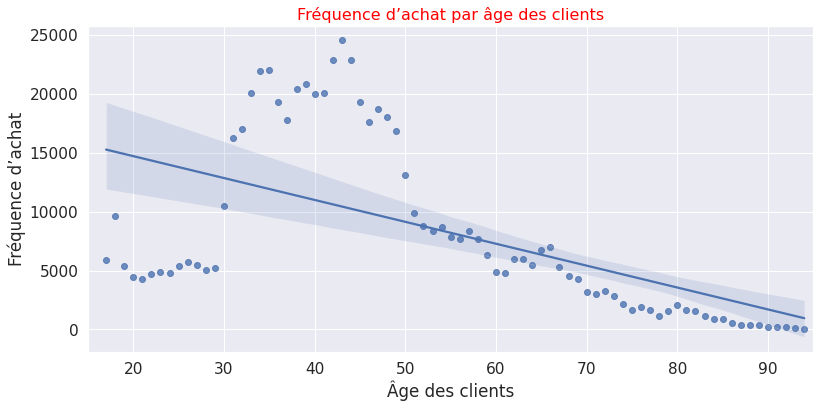

In [160]:
plt.figure(figsize=(13, 6))
sns.regplot(x='age', y='count', data = age_ca)
plt.ylabel( 'Fréquence d’achat')
plt.xlabel('Âge des clients')
plt.title("Fréquence d’achat par âge des clients",fontsize= 16, color = 'red')
plt.xlim(15,95)

- Test de corrélation (pearson)

In [161]:
print('La covariance est de:', np.cov(age_ca['age'], age_ca['count'],ddof=0)[1,0])
print('Le coefficient de corrélation linéaire est de:', stats.pearsonr(age_ca['age'], age_ca['count'])[0])

La covariance est de: -94213.75000000001
Le coefficient de corrélation linéaire est de: -0.5774108789114262


*Conclusion:*

Pour tester deux variables quantitatives, avec le test de Pearson, j’obtient un coefficient de -0.577. Il représente une corrélation légèrement négative de nos 2 variables (visible aussi par régression linéaire). Quand on regarde le graphique, on peut voir que cette corrélation concerne plutôt les clients à partir de 50 ans.

Cependant, on ne retrouve pas cette relation pour les clients de moins de 50 ans:

- Pour les moins de 30 ans, la fréquence est autour de 5000.
- Pour les clients entre 31 et 50 ans, la fréquence est irrégulière.

#Lien entre l’âge des clients et la taille du panier moyen

Pour tester deux variables quantitatives, je utilise:

- Visualisation avec nuage de points
- Test de corrélation (pearson)
##Calcul de la taille du panier moyen

In [162]:
age_ca['panier_moyen'] = age_ca['sum']/age_ca['count']
age_ca.head()

,age,count,sum,panier_moyen
0,94,23,437.77,19.033478
1,93,129,2115.62,16.400155
2,92,196,3309.62,16.885816
3,91,210,3455.02,16.452476
4,90,243,4114.03,16.930165


- Visualisation de la taille du panier moyen par âge des clients

Text(0.5, 1.0, 'Taille du panier moyen par âge des clients')

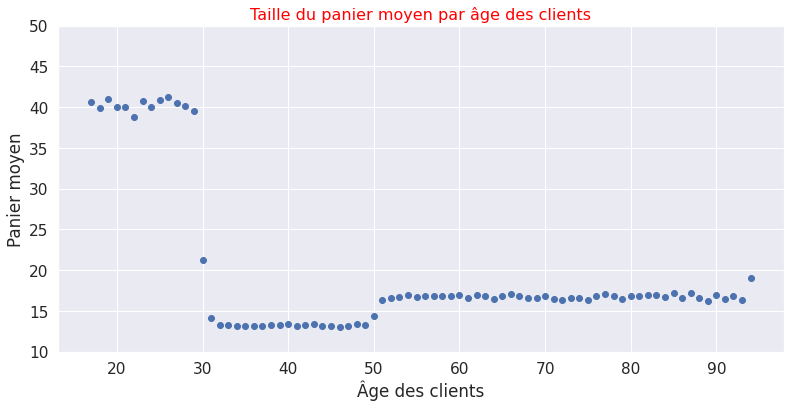

In [163]:
plt.figure(figsize=(13, 6))
plt.ylim(10,50)
plt.scatter(x='age', y='panier_moyen', data = age_ca)
plt.ylabel( 'Panier moyen')
plt.xlabel('Âge des clients')
plt.title("Taille du panier moyen par âge des clients",fontsize= 16, color = 'red')

- Test de corrélation (pearson)

In [164]:
print('La covariance est de:', np.cov(age_ca['age'], age_ca['panier_moyen'],ddof=0)[1,0])
print('Le coefficient de corrélation linéaire est de:', stats.pearsonr(age_ca['age'], age_ca['panier_moyen'])[0])

La covariance est de: -114.69534019271495
Le coefficient de corrélation linéaire est de: -0.5499076007560519


#*Conclusion:*
Avec la test de Pearson, j’obtiens un coefficient de -0.549. Celà représente une corrélation légèrement négative des 2 variables.
On observe sur le graphique que:

- Les jeunes de moins de 31 ans ont un panier moyen plus élevé avec un montant assez constant (autour de 40 euros) .
- Les clients entre 31-50 ans ont une taille du panier moyen le plus basse avec un montant quasi constant (autour de 13 euros) , même si leur fréquence d’achat est la plus élevée.
- Les clients à partir de 50 ans ont une taille de panier moyen à montant quasi constant, mais un peu plus élevé (autour de 17 euros).

#Lien entre l’âge des clients et les catégories des livres achetés
Pour tester une variable quantitative (âge) et une variable qualitative (catégories) , j'utilise:

- Visualisation avec boxplots
- Vérification de la possibilité d'utiliser ANOVA
- Test de Kruskal-Wallis
- Test ANOVA
#Visualisation avec boxplots

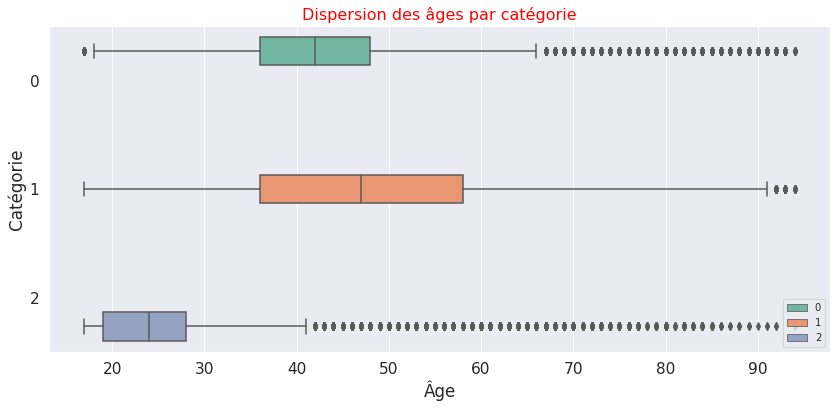

In [165]:
# Dispersion des âges des clients par catégorie
categories = ['catégorie 0', 'catégorie 1', 'catégorie 2']
plt.figure(figsize=(14, 6))
sns.boxplot(y="categ", x="age", data = df_final_c, orient='h', hue='categ', palette='Set2')
plt.title('Dispersion des âges par catégorie',fontsize= 16, color = 'red')
plt.xlabel('Âge')
plt.ylabel('Catégorie')
plt.legend(loc='lower right', fontsize=10)

##Rapport de corrélation η2 (eta carré )

- η2=0 , cela signifie que les moyennes par classes sont toutes égales. Il n’y a donc pas à priori de relation entre les deux variables.
- η2=1 , cela signifie que les moyennes par classes sont très différentes, chacune des classes étant constituée de valeurs identiques : il existe donc à priori une relation entre les deux variables.

In [166]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

eta_s  =eta_squared(df_final_c['categ'], df_final_c['age'])

In [167]:
print('Le rapport de corrélation ', round(eta_s,2) ,', indique que ces 2 variables sont faiblement corrélés')

Le rapport de corrélation  0.11 , indique que ces 2 variables sont faiblement corrélés


#Vérification de la possibilité d'utiliser la méthode ANOVA

Si la variable âge ne suit pas une loi normale et que les variances pour chaque groupe ne sont pas égales, on utilise le test de Kruskal – Wallis qui est similaire au test d'ANOVA.)

- Test de Kolmogorov-Smirnov - vérification de la normalité de chaque groupe de la variable 'categ'

Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:

- H0:la variable suit une loi normale
- H1:la variable ne suit pas une loi normale

In [168]:
ca_0 = df_final_c[df_final_c['categ'] == 0]['age']
ca_1= df_final_c[df_final_c['categ'] == 1]['age']
ca_2 = df_final_c[df_final_c['categ'] == 2]['age']

In [169]:
# Test la normalité pour les données de catégorie 0
test_stat_0 =kstest(ca_0, 'norm')
test_stat_0

KstestResult(statistic=1.0, pvalue=0.0)

In [170]:
# Test la normalité pour les données de catégorie 1
test_stat_1 =kstest(ca_1, 'norm')
test_stat_1

KstestResult(statistic=1.0, pvalue=0.0)

In [171]:
# Test la normalité pour les données de catégorie 2
test_stat_2 =kstest(ca_2, 'norm')
test_stat_2

KstestResult(statistic=1.0, pvalue=0.0)

Pour ces 3 catégories les p_valeurs sont < 0.5; nous rejetons l’hypothèse nulle, aussi la variable âge ne suit pas une loi normale.

**- Test de Bartlett - vérification de l'homogénéité de chaque groupe de la variable 'categ'**

Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:
- H0: les variances de chaque groupe de catégorie sont égaux
- H1: les variances de chaque groupe de catégorie ne sont pas égaux

In [172]:
stat, p = bartlett(ca_0, ca_1, ca_2)
print( 'p_value:',p)

p_value: 0.0


- p_value < 0.05, nous rejetons l’hypothèse nulle, donc les variances de chaque groupe de catégorie ne sont pas égales.

Vu que la variable âge ne suit pas la loi normale et que les variances de chaque groupe ne sont pas égales, alors je ne peux pas utiliser ANOVA

j'utilse donc le test de Kruskal – Wallis qui est équivalent à ANOVA, mais non paramétrique, en utilisant les médianes au lieu des moyennes.

**Test de Kruskal-Wallis**

Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:
- H0: les médians de chaque groupe de catégorie sont égaux
- H1: les médians de chaque groupe de catégorie ne sont pas égaux

In [173]:
stats.kruskal(ca_0, ca_1, ca_2)

KruskalResult(statistic=72325.29690477607, pvalue=0.0)

p_valeur < 0.05, nous rejetons l’hypothèse nulle, donc les médians de chaque groupe de catégorie ne sont pas égaux.

##Test de ANOVA (essai)

Je realise un test de ANOVA, même si les données ne s'y prêtent pas, pour une variable quantitative et une variable qualitative

- Test de la moyenne (f_oneway)
Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:
- H0: les moyennes de chaque groupe de catégorie sont égaux
- H1: les moyennes de chaque groupe de catégorie ne sont pas égaux

In [174]:
fvalue, pvalue= stats.f_oneway(ca_0, ca_1, ca_2)
print('f_value:',fvalue, ', p_value:',pvalue )

f_value: 40424.425295357185 , p_value: 0.0


p_valeur < 0.05, nous rejetons l’hypothèse nulle, donc les moyennes de chaque groupe de catégorie ne sont pas égaux

##*Conclusion:*

- Avec le rapport de corrélation 0.11 , on identifie un lien faible entre l’âge des clients et les catégories des livres achetés.
- Mais avec les tests de 'Kruskal-Wallis' et 'ANOVA', on trouve que les médians ou les moyennes de chaque groupe de catégorie sont différents, et également sur la graphique boxplots, celà donne l'impression que chacune des tranches d'âge ont des préférences de catégories d'achat; aussi pour le confirmer ou l'infirmer , nous allons faire un test de Khi2 entre deux variables qualitatives ('tranche d'âge' et 'catégorie de produits').

#Analyse deux variables qualitatives

Je réalise une nouvelle analyse basée sur des tranches d'ages et les 3 catégories, en réalisant une analyse avec Chi-2:

- Création d'un tableau de contingence
- Calcul du coefficient de chi2

Il est cependant possible de faire apparaître sur ce tableau les cases participants le plus à une possible corrélation, via un heatmap.

In [175]:
# Définir les tranches d'âge
df_final_c['age_tranche']= pd.cut(df_final_c['age'], bins=[0,25,50,75,95])
df_final_c.head()

,client_id,sex,birth,id_prod,date,session_id,number,heure,year,month,day,price,categ,_merge,month_2,age,age_tranche
0,c_103,f,1986,0_1518,2022-05-20,s_211425,043970,13:21:29,2022,5,20,4.18,0,both,2022-05,36,"(25, 50]"
1,c_8534,m,1988,1_251,2022-02-02,s_158752,149409,07:55:19,2022,2,2,15.99,1,both,2022-02,34,"(25, 50]"
2,c_6941,m,2000,2_209,2021-06-24,s_52962,835891,04:19:29,2021,6,24,69.99,2,both,2021-06,21,"(0, 25]"
3,c_4232,m,1980,0_1509,2023-01-11,s_325227,194479,08:22:08,2023,1,11,4.99,0,both,2023-01,43,"(25, 50]"
4,c_1478,f,1972,0_1418,2022-10-20,s_285425,084030,15:59:16,2022,10,20,8.57,0,both,2022-10,50,"(25, 50]"


- Création d'une table de contingence -- variables «tranche d'âge» et « catégorie »

In [176]:
x = 'age_tranche'
y = 'categ'
cont_age = df_final_c[[x, y]].pivot_table(index=x, columns=y,aggfunc=len, margins=True, margins_name='Total' )
cont_age

categ,0,1,2,Total
age_tranche,,,,
"(0, 25]",11257,18526,19695,49478
"(25, 50]",305637,104023,11688,421348
"(50, 75]",63272,80246,1284,144802
"(75, 95]",7327,9553,181,17061
Total,387493,212348,32848,632689


**Test de Khi2**

Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:
- H0: Les deux variables (les tranches d'âge des clients et les catégories des livres achetés ) sont indépendantes
- H1: les deux variables ne sont pas indépendantes

In [177]:
chi2, pvalue, degrees, expected = stats.chi2_contingency(cont_age)
chi2, degrees, pvalue

(186887.18230340153, 12, 0.0)

**- Heatmap**

Chaque valeur de chaque case du Heatmap est une mesure de la contribution à la non-indépendance entre la catégorie de produit et le genre, qui prend des valeurs entre 0 et 1. 0 représentant une source d'indépendance, et 1 une source de non-indépendance.

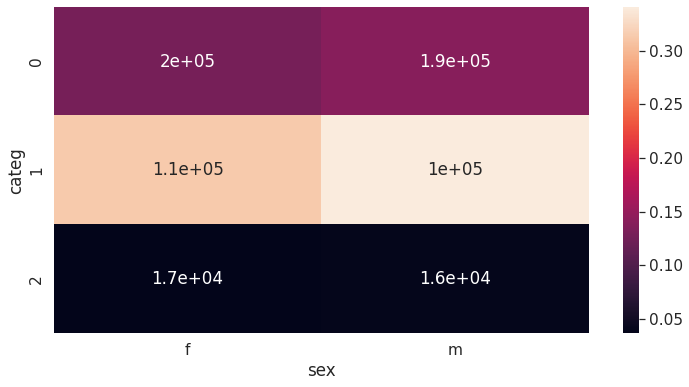

In [178]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_final_c)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
sns.set(rc={'figure.figsize': (12, 6)},font_scale=1.4)

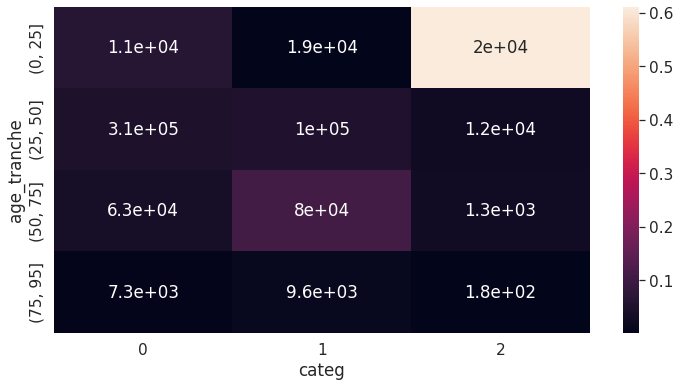

In [179]:
tx = cont_age.loc[:,["Total"]]
ty = cont_age.loc[["Total"],:]
n = len(df_final_c)
indep = tx.dot(ty) / n

c = cont_age.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table_2 = measure/xi_n
sns.heatmap(table_2.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
sns.set(rc={'figure.figsize': (12, 6)},font_scale=1.4)

*Conclusion:*

Notre p-value étant de 0 et < 0.05 (alpha = 5%), on rejete H0 et on peut alors conclure que les variables tranche d'âge et catégorie de produits sont dépendantes.
Avec le heatmap, on trouve qu'il y a une forte corrélation entre les personnes âgés de moins de 25 ans et la catégorie 2 de produits: la catégorie 2 est la préférée des jeunes. Il serait donc opportun de cibler cette catégorie d'âge lors des campagne de publicité concernant les produits de la catégorie 2.